# **Program to download and pre-process North Dakota well data for sub-county analysis**

# **1.a  Download North Dakota monthly production data from DMR ~10min**



In [1]:
import requests
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta


In [2]:
# create list of all yyyy-mm for data download (Note, May 2015 is the first month ND data is available in xlxs)
myList = pd.date_range('2015-04-10',datetime.today()- relativedelta(months=3), freq='MS').strftime("%Y_%m").tolist()  # with month in numeric format

# Access the ND DMR data @ https://www.dmr.nd.gov/oilgas/mprindex.asp
website = "https://www.dmr.nd.gov/oilgas/mpr/"

In [3]:
# Review the list of monthly data
myList

['2015_05',
 '2015_06',
 '2015_07',
 '2015_08',
 '2015_09',
 '2015_10',
 '2015_11',
 '2015_12',
 '2016_01',
 '2016_02',
 '2016_03',
 '2016_04',
 '2016_05',
 '2016_06',
 '2016_07',
 '2016_08',
 '2016_09',
 '2016_10',
 '2016_11',
 '2016_12',
 '2017_01',
 '2017_02',
 '2017_03',
 '2017_04',
 '2017_05',
 '2017_06',
 '2017_07',
 '2017_08',
 '2017_09',
 '2017_10',
 '2017_11',
 '2017_12',
 '2018_01',
 '2018_02',
 '2018_03',
 '2018_04',
 '2018_05',
 '2018_06',
 '2018_07',
 '2018_08',
 '2018_09',
 '2018_10',
 '2018_11',
 '2018_12',
 '2019_01',
 '2019_02',
 '2019_03',
 '2019_04',
 '2019_05',
 '2019_06',
 '2019_07',
 '2019_08',
 '2019_09',
 '2019_10',
 '2019_11',
 '2019_12',
 '2020_01',
 '2020_02',
 '2020_03',
 '2020_04',
 '2020_05',
 '2020_06',
 '2020_07',
 '2020_08',
 '2020_09',
 '2020_10',
 '2020_11',
 '2020_12',
 '2021_01',
 '2021_02',
 '2021_03',
 '2021_04',
 '2021_05',
 '2021_06',
 '2021_07',
 '2021_08',
 '2021_09',
 '2021_10',
 '2021_11',
 '2021_12',
 '2022_01',
 '2022_02',
 '2022_03',
 '20

In [4]:
NDMWD = []  #list()  # North Dakota Monthly Well (NDMWD) Data download process ~ 10 minutes
for month in myList:
    target_url = website + month + '.xlsx'
    print(target_url)
    r = requests.get(target_url)
    wb = pd.read_excel(r.content)
    NDMWD.append(wb)

NDMWD = pd.concat(NDMWD)

https://www.dmr.nd.gov/oilgas/mpr/2015_05.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_06.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_07.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_08.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_09.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_10.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_11.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2015_12.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_01.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_02.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_03.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_04.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_05.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_06.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_07.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_08.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_09.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_10.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_11.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2016_12.xlsx
https://www.dmr.nd.gov/oilgas/mpr/2017_01.xlsx
https://www.d

In [5]:
#Create ND monthly well data table in csv format, which can be downloaded from folder on left hand side
NDMWD.to_csv('NDMWD.csv', index=False)

In [6]:
NDMWD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1706085 entries, 0 to 20182
Data columns (total 21 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ReportDate  datetime64[ns]
 1   API_WELLNO  int64         
 2   FileNo      int64         
 3   Company     object        
 4   WellName    object        
 5   Quarter     object        
 6   Section     float64       
 7   Township    float64       
 8   Range       float64       
 9   County      object        
 10  FieldName   object        
 11  Pool        object        
 12  Oil         float64       
 13  Wtr         float64       
 14  Days        float64       
 15  Runs        int64         
 16  Gas         float64       
 17  GasSold     int64         
 18  Flared      float64       
 19  Lat         float64       
 20  Long        float64       
dtypes: datetime64[ns](1), float64(10), int64(4), object(6)
memory usage: 286.4+ MB


# **1.b Extract first month oil and gas produciton data, latitude and longitude**

In [7]:
#NDMWD = pd.read_csv('NDMWD.csv')
NDMWD.drop_duplicates(inplace=True)
NDMWD = NDMWD[NDMWD['Days'] >= 25].reset_index(drop=True)
NDMWD['ReportDate'] = pd.to_datetime(NDMWD['ReportDate'], errors = 'coerce')
NDMWD.tail(2)

ReportDate      API_WELLNO  FileNo                  Company WellName  \
1234977 2023-06-01  33009012640000    6347  EMPIRE NORTH DAKOTA LLC   RICE 2   
1234978 2023-06-01  33009019570000   13685  EMPIRE NORTH DAKOTA LLC   RICE 3   

        Quarter  Section  Township  Range County  ...               Pool  \
1234977    SENW     26.0     163.0   79.0    BOT  ...  SPEARFISH/MADISON   
1234978    NENW     26.0     163.0   79.0    BOT  ...  SPEARFISH/MADISON   

          Oil     Wtr  Days  Runs  Gas  GasSold  Flared        Lat        Long  
1234977  25.0   268.0  30.0     0  0.0        0     0.0  48.917191 -100.876462  
1234978  51.0  6565.0  30.0     0  0.0        0     0.0  48.920808 -100.877109  

[2 rows x 21 columns]

In [8]:
ffmWells = NDMWD[['API_WELLNO', 'Pool','ReportDate']].groupby('API_WELLNO').min().rename(columns={'ReportDate':'ffMonth'}).reset_index()
ffmWells.tail(3)

API_WELLNO     Pool    ffMonth
20439  33105058760000   BAKKEN 2023-05-01
20440  33105061150000  MADISON 2023-06-01
20441  33105903870000   DAKOTA 2018-01-01

In [9]:
ffmWells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20442 entries, 0 to 20441
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  20442 non-null  int64         
 1   Pool        20442 non-null  object        
 2   ffMonth     20442 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 479.2+ KB


In [10]:
ffmWells = ffmWells.merge(NDMWD[['API_WELLNO','Pool','ReportDate','Oil','Gas','Wtr','Days','Runs', 'Lat', 'Long']], how='left', left_on=['API_WELLNO','Pool','ffMonth'], right_on = ['API_WELLNO','Pool','ReportDate'])
ffmWells.dropna(inplace=True)
ffmWells.reset_index(drop=True)
ffmWells.tail()

API_WELLNO     Pool    ffMonth ReportDate      Oil      Gas  \
20437  33105058570000   BAKKEN 2023-05-01 2023-05-01  26701.0  24497.0   
20438  33105058750000   BAKKEN 2023-03-01 2023-03-01  40250.0  31819.0   
20439  33105058760000   BAKKEN 2023-05-01 2023-05-01  31521.0  26441.0   
20440  33105061150000  MADISON 2023-06-01 2023-06-01    938.0     27.0   
20441  33105903870000   DAKOTA 2018-01-01 2018-01-01    410.0      0.0   

           Wtr  Days     Runs        Lat        Long  
20437  64246.0  31.0  26751.0  48.167755 -103.719029  
20438  93444.0  25.0  39436.0  48.169415 -103.699984  
20439  69949.0  31.0  31478.0  48.169418 -103.700107  
20440    686.0  30.0   1282.0  48.016557 -103.859187  
20441      0.0  31.0    946.0  48.404169 -103.475385

In [11]:
ffmWells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20412 entries, 0 to 20441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  20412 non-null  int64         
 1   Pool        20412 non-null  object        
 2   ffMonth     20412 non-null  datetime64[ns]
 3   ReportDate  20412 non-null  datetime64[ns]
 4   Oil         20412 non-null  float64       
 5   Gas         20412 non-null  float64       
 6   Wtr         20412 non-null  float64       
 7   Days        20412 non-null  float64       
 8   Runs        20412 non-null  float64       
 9   Lat         20412 non-null  float64       
 10  Long        20412 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(1)
memory usage: 1.9+ MB


In [12]:
ffmWells.drop('ReportDate', axis=1, inplace=True )
ffmWells['bpd'] =  ffmWells.Oil/ffmWells.Days
ffmWells['Mcfpd'] =  ffmWells.Gas/ffmWells.Days

In [13]:
ffmWells.tail()

API_WELLNO     Pool    ffMonth      Oil      Gas      Wtr  Days  \
20437  33105058570000   BAKKEN 2023-05-01  26701.0  24497.0  64246.0  31.0   
20438  33105058750000   BAKKEN 2023-03-01  40250.0  31819.0  93444.0  25.0   
20439  33105058760000   BAKKEN 2023-05-01  31521.0  26441.0  69949.0  31.0   
20440  33105061150000  MADISON 2023-06-01    938.0     27.0    686.0  30.0   
20441  33105903870000   DAKOTA 2018-01-01    410.0      0.0      0.0  31.0   

          Runs        Lat        Long          bpd        Mcfpd  
20437  26751.0  48.167755 -103.719029   861.322581   790.225806  
20438  39436.0  48.169415 -103.699984  1610.000000  1272.760000  
20439  31478.0  48.169418 -103.700107  1016.806452   852.935484  
20440   1282.0  48.016557 -103.859187    31.266667     0.900000  
20441    946.0  48.404169 -103.475385    13.225806     0.000000

In [14]:
ffmWells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20412 entries, 0 to 20441
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   API_WELLNO  20412 non-null  int64         
 1   Pool        20412 non-null  object        
 2   ffMonth     20412 non-null  datetime64[ns]
 3   Oil         20412 non-null  float64       
 4   Gas         20412 non-null  float64       
 5   Wtr         20412 non-null  float64       
 6   Days        20412 non-null  float64       
 7   Runs        20412 non-null  float64       
 8   Lat         20412 non-null  float64       
 9   Long        20412 non-null  float64       
 10  bpd         20412 non-null  float64       
 11  Mcfpd       20412 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 2.0+ MB


# **1.c Wells latitude and longitude to MHB allocation**

In [15]:
# Maidenhead grid locators courtesy of Walter Underwood K6WRU:
# https://ham.stackexchange.com/questions/221/how-can-one-convert-from-lat-long-to-grid-square


In [16]:
upper = 'ABCDEFGHIJKLMNOPQRSTUVWX'
lower = 'abcdefghijklmnopqrstuvwx'

In [17]:
def gridCalc(row):
    dec_lat = row['Lat']
    dec_lon = row['Long']
    if not (-180<=dec_lon<180):
        sys.stderr.write('longitude must be -180<=lon<180, given %f\n'%dec_lon)
        sys.exit(32)
    if not (-90<=dec_lat<90):
        sys.stderr.write('latitude must be -90<=lat<90, given %f\n'%dec_lat)
        sys.exit(33) # can't handle north pole, sorry, [A-R]

    adj_lat = dec_lat + 90.0
    adj_lon = dec_lon + 180.0

    grid_lat_sq = upper[int(adj_lat/10)];
    grid_lon_sq = upper[int(adj_lon/20)];

    grid_lat_field = str(int(adj_lat%10))
    grid_lon_field = str(int((adj_lon/2)%10))

    adj_lat_remainder = (adj_lat - int(adj_lat)) * 60
    adj_lon_remainder = ((adj_lon) - int(adj_lon/2)*2) * 60

    grid_lat_subsq = lower[int(adj_lat_remainder/2.5)]
    grid_lon_subsq = lower[int(adj_lon_remainder/5)]

    return grid_lon_sq + grid_lat_sq + grid_lon_field + grid_lat_field + grid_lon_subsq + grid_lat_subsq

In [18]:
ffmWells['MHB'] = ffmWells.apply(gridCalc, axis=1)

In [19]:
ffmWells.tail()

API_WELLNO     Pool    ffMonth      Oil      Gas      Wtr  Days  \
20437  33105058570000   BAKKEN 2023-05-01  26701.0  24497.0  64246.0  31.0   
20438  33105058750000   BAKKEN 2023-03-01  40250.0  31819.0  93444.0  25.0   
20439  33105058760000   BAKKEN 2023-05-01  31521.0  26441.0  69949.0  31.0   
20440  33105061150000  MADISON 2023-06-01    938.0     27.0    686.0  30.0   
20441  33105903870000   DAKOTA 2018-01-01    410.0      0.0      0.0  31.0   

          Runs        Lat        Long          bpd        Mcfpd     MHB  
20437  26751.0  48.167755 -103.719029   861.322581   790.225806  DN88de  
20438  39436.0  48.169415 -103.699984  1610.000000  1272.760000  DN88de  
20439  31478.0  48.169418 -103.700107  1016.806452   852.935484  DN88de  
20440   1282.0  48.016557 -103.859187    31.266667     0.900000  DN88ba  
20441    946.0  48.404169 -103.475385    13.225806     0.000000  DN88gj

In [20]:
ffmWells.to_csv('ffmWells.csv', index=False)

# **2.a Download well bore data from ND DMR ~5min**

In [21]:
!pip install dbfread

In [22]:
import pandas as pd
import plotly.express as px
from dbfread import DBF
import ipywidgets as widgets
import csv
from math import radians, sin, cos, sqrt, atan2

In [23]:
# run command to download data.  In case it is not able to download, open the link and upload the data to this notebook from left hand side menu.
!wget https://gis.dmr.nd.gov/downloads/oilgas/shapefile/OGD_Horizontals.zip

--2023-09-13 22:04:38--  https://gis.dmr.nd.gov/downloads/oilgas/shapefile/OGD_Horizontals.zip
Resolving gis.dmr.nd.gov (gis.dmr.nd.gov)... 165.234.156.197
Connecting to gis.dmr.nd.gov (gis.dmr.nd.gov)|165.234.156.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314320068 (300M) [application/x-zip-compressed]
Saving to: ‘OGD_Horizontals.zip’

OGD_Horizontals.zip 100%[===================>] 299.76M  62.9MB/s    in 5.1s    

2023-09-13 22:04:44 (58.3 MB/s) - ‘OGD_Horizontals.zip’ saved [314320068/314320068]



In [24]:
!unzip OGD_Horizontals.zip

Archive:  OGD_Horizontals.zip
  inflating: OGD_Horizontals.cpg     
  inflating: OGD_Horizontals.dbf     
  inflating: OGD_Horizontals.prj     
  inflating: OGD_Horizontals.sbn     
  inflating: OGD_Horizontals.sbx     
  inflating: OGD_Horizontals.shp     
  inflating: OGD_Horizontals.shp.xml  
  inflating: OGD_Horizontals.shx     
  inflating: OGD_Horizontals_Line.cpg  
  inflating: OGD_Horizontals_Line.dbf  
  inflating: OGD_Horizontals_Line.prj  
  inflating: OGD_Horizontals_Line.sbn  
  inflating: OGD_Horizontals_Line.sbx  
  inflating: OGD_Horizontals_Line.shp  
  inflating: OGD_Horizontals_Line.shp.xml  
  inflating: OGD_Horizontals_Line.shx  


In [25]:
# to write OGD_Horizontals.dbf to csv file ~ 2 minutes
filename= 'OGD_Horizontals.dbf'
table = DBF(filename)
f=open('ndWells.csv', 'w')
writer = csv.writer(f)
writer.writerow(table.field_names)
for record in table:
  writer.writerow(list(record.values()))

In [26]:
dfWells = pd.read_csv('ndWells.csv')
dfWells.head(3)

wl_permit      api_wellno          api_format        long        lat  \
0       1741  33007000260000  33-007-00026-00-00 -103.392973  46.866931   
1       1741  33007000260000  33-007-00026-00-00 -103.392971  46.866931   
2       1741  33007000260000  33-007-00026-00-00 -103.392969  46.866931   

  well_sub  measdpth  inclinatio  azimuth          tvd    coordns coordnsdir  \
0     LAT1    9000.0        0.77     4.33  8999.030273  38.310001          N   
1     LAT1    9015.0        3.30    88.00  9014.021484  38.425602          N   
2     LAT1    9022.0        5.30    88.00  9021.000977  38.443920          N   

     coordew coordewdir surveytype  
0  35.090000          W        STP  
1  34.650803          W        SPT  
2  34.126297          W        SPT

# **2.b Filter out first laterals and estimate lateral length**

In [27]:
dfWells['myLateral'] = ['1stLat' if x=='LAT1' else '1stLat' if x=='STK1' else 'VERT' if x=='VERT' else 'othLat' for x in dfWells['well_sub']]
dfWells.tail(3)

wl_permit      api_wellno          api_format        long        lat  \
4887327      90466  33105904660000  33-105-90466-00-00 -103.420477  48.290169   
4887328      90466  33105904660000  33-105-90466-00-00 -103.411593  48.287814   
4887329      90466  33105904660000  33-105-90466-00-00 -103.411592  48.287815   

        well_sub  measdpth  inclinatio     azimuth          tvd     coordns  \
4887327     LAT1    7872.0   90.800003  291.200012  5791.367676  852.520142   
4887328     VERT    2169.0    0.600000   64.300003  2168.926025    5.726171   
4887329     VERT    2242.0    0.100000  293.399994  2241.924805    5.535115   

        coordnsdir      coordew coordewdir surveytype myLateral  
4887327          N  2157.132568          W        PTB    1stLat  
4887328          S     0.335675          E        STP      VERT  
4887329          S     0.621622          E        SPT      VERT

In [28]:
flWells = dfWells.groupby(['api_wellno','myLateral']).agg(latMin=('lat', 'min'),latMax=('lat', 'max'),
                                                        longMin=('long', 'min'),longMax=('long', 'max'),
                                                        tvdMin=('tvd', 'min'),tvdMax=('tvd', 'max')).reset_index()

In [29]:
def latft(latMin, latMax, longMin, longMax):

    R = 20925721

    lat1 = radians(latMin)
    lon1 = radians(longMin)
    lat2 = radians(latMax)
    lon2 = radians(longMax)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    #print("latL_km:", distance)
    return distance

In [30]:
flWells['totll'] = flWells.apply(lambda row: latft(row['latMin'],row['latMax'],row['longMin'],row['longMax']),  axis=1)

In [31]:
flWellsOnly = flWells[['api_wellno','myLateral','totll']][flWells['myLateral'] == '1stLat'].reset_index(drop=True)
flWellsOnly.tail()

api_wellno myLateral         totll
19965  33105060500000    1stLat  10745.854055
19966  33105060730000    1stLat    545.682062
19967  33105902990000    1stLat   2102.817016
19968  33105904500000    1stLat   1787.417830
19969  33105904660000    1stLat   2305.694952

In [32]:
flWellsOnly[['api_wellno','myLateral','totll']].to_csv('flWellsOnly.csv', index=False)

In [33]:
flWells[flWells['api_wellno']==33105040690000]

api_wellno myLateral     latMin     latMax     longMin     longMax  \
37364  33105040690000    1stLat  48.282229  48.282416 -102.980406 -102.979728   
37365  33105040690000      VERT  48.282314  48.282738 -102.983372 -102.979511   

            tvdMin       tvdMax       totll  
37364  7251.502930  8439.927734  178.459657  
37365  1768.457642  8985.621094  951.301084

In [34]:
## 3D plot of specific well to verify estimation
plWell = dfWells[['api_wellno','lat','long','tvd','well_sub']][dfWells['api_wellno'] == 33105040690000]

In [35]:
fig = px.scatter_3d(plWell, x='long', y='lat', z='tvd', color='well_sub')
fig.update_traces(marker_size = 3)
fig.update_scenes(yaxis_autorange="reversed")
fig.update_scenes(xaxis_autorange="reversed")
fig.update_scenes(zaxis_range=[16000, 0])
fig.update_layout({
    'plot_bgcolor': 'rgba(100, 0, 0, 0)',
    'paper_bgcolor': 'rgba(0, 0, 0, 0)',
                      })

# **3.a Download and unzip FracFocus.org well completion data ~5min**

In [36]:
import pandas as pd
import requests
import zipfile
import io
import datetime

In [37]:
link2FFcsvZip = 'http://fracfocusdata.org/digitaldownload/FracFocusCSV.zip'

In [38]:
request = requests.get(link2FFcsvZip)
zipBag = zipfile.ZipFile(io.BytesIO(request.content))

In [39]:
zipFiles = zipBag.namelist()
zipFiles

['FracFocusRegistry_1.csv',
 'FracFocusRegistry_10.csv',
 'FracFocusRegistry_11.csv',
 'FracFocusRegistry_12.csv',
 'FracFocusRegistry_13.csv',
 'FracFocusRegistry_14.csv',
 'FracFocusRegistry_15.csv',
 'FracFocusRegistry_16.csv',
 'FracFocusRegistry_17.csv',
 'FracFocusRegistry_18.csv',
 'FracFocusRegistry_19.csv',
 'FracFocusRegistry_2.csv',
 'FracFocusRegistry_20.csv',
 'FracFocusRegistry_21.csv',
 'FracFocusRegistry_22.csv',
 'FracFocusRegistry_23.csv',
 'FracFocusRegistry_24.csv',
 'FracFocusRegistry_25.csv',
 'FracFocusRegistry_3.csv',
 'FracFocusRegistry_4.csv',
 'FracFocusRegistry_5.csv',
 'FracFocusRegistry_6.csv',
 'FracFocusRegistry_7.csv',
 'FracFocusRegistry_8.csv',
 'FracFocusRegistry_9.csv',
 'readme.txt',
 'registryupload_1.csv',
 'registryupload_2.csv',
 'registryupload_3.csv']

In [40]:
#Unzip files and create corresponding dataframes
RegistryUpload_files=[]
FracFocusRegistry_files=[]

In [41]:
for file_name in zipFiles:
    if (('registryupload' in file_name)) & (file_name.endswith('.csv')):
        RegistryUpload_files.append(file_name)
    if (('FracFocusRegistry' in file_name)) & (file_name.endswith('.csv')):
        FracFocusRegistry_files.append(file_name)

In [42]:
RegistryUpload_files

['registryupload_1.csv', 'registryupload_2.csv', 'registryupload_3.csv']

In [43]:
dfs = list()
for file_name in RegistryUpload_files:
    df = pd.read_csv(zipBag.open(file_name), low_memory=False, dtype={'APINumber': 'str','StateNumber': 'str', 'CountyNumber': 'str'})
    dfs.append(df)

RegistryUpload = pd.concat(dfs, axis=0, ignore_index=True)
RegistryUpload.head(2)

pKey           JobStartDate  \
0  448c1dab-c7fd-4e07-9d6f-e3b1cf64b708   5/1/1955 12:00:00 AM   
1  f66add2e-8ea8-4843-9388-24725b5d37c1  5/19/1982 12:00:00 AM   

              JobEndDate       APINumber StateNumber CountyNumber  \
0   5/1/1955 12:00:00 AM  42317372620000          42          317   
1  5/19/1982 12:00:00 AM  49009219470000          49          009   

                 OperatorName             WellName   Latitude   Longitude  \
0   Pioneer Natural Resources         Rogers 42 #5  32.283431 -101.906575   
1  Chesapeake Operating, Inc.  WILLIAM VALENTINE 1  42.972810 -105.953840   

   ... TVD  TotalBaseWaterVolume  TotalBaseNonWaterVolume  StateName  \
0  ... NaN                   NaN                      NaN      Texas   
1  ... NaN                   NaN                      NaN    WYOMING   

  CountyName FFVersion  FederalWell  IndianWell  Source  DTMOD  
0     Martin         1        False       False     NaN    NaN  
1   CONVERSE         1        False       False     NaN    NaN  

[2 rows x 21 columns]

In [44]:
RegistryUpload.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211481 entries, 0 to 211480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   pKey                     211481 non-null  object 
 1   JobStartDate             211466 non-null  object 
 2   JobEndDate               211481 non-null  object 
 3   APINumber                211481 non-null  object 
 4   StateNumber              211481 non-null  object 
 5   CountyNumber             211481 non-null  object 
 6   OperatorName             211481 non-null  object 
 7   WellName                 211481 non-null  object 
 8   Latitude                 211481 non-null  float64
 9   Longitude                211481 non-null  float64
 10  Projection               211481 non-null  object 
 11  TVD                      181341 non-null  float64
 12  TotalBaseWaterVolume     181312 non-null  float64
 13  TotalBaseNonWaterVolume  161198 non-null  float64
 14  Stat

In [45]:
FracFocusRegistry_files

['FracFocusRegistry_1.csv',
 'FracFocusRegistry_10.csv',
 'FracFocusRegistry_11.csv',
 'FracFocusRegistry_12.csv',
 'FracFocusRegistry_13.csv',
 'FracFocusRegistry_14.csv',
 'FracFocusRegistry_15.csv',
 'FracFocusRegistry_16.csv',
 'FracFocusRegistry_17.csv',
 'FracFocusRegistry_18.csv',
 'FracFocusRegistry_19.csv',
 'FracFocusRegistry_2.csv',
 'FracFocusRegistry_20.csv',
 'FracFocusRegistry_21.csv',
 'FracFocusRegistry_22.csv',
 'FracFocusRegistry_23.csv',
 'FracFocusRegistry_24.csv',
 'FracFocusRegistry_25.csv',
 'FracFocusRegistry_3.csv',
 'FracFocusRegistry_4.csv',
 'FracFocusRegistry_5.csv',
 'FracFocusRegistry_6.csv',
 'FracFocusRegistry_7.csv',
 'FracFocusRegistry_8.csv',
 'FracFocusRegistry_9.csv']

In [46]:
dfs = list()
for file_name in FracFocusRegistry_files:
    df = pd.read_csv(zipBag.open(file_name), low_memory=False, dtype={'APINumber': 'str','StateNumber': 'str', 'CountyNumber': 'str'})
    dfs.append(df)

FracFocusRegistry = pd.concat(dfs, axis=0, ignore_index=True)
FracFocusRegistry.head(2)

UploadKey          JobStartDate  \
0  448c1dab-c7fd-4e07-9d6f-e3b1cf64b708  5/1/1955 12:00:00 AM   
1  448c1dab-c7fd-4e07-9d6f-e3b1cf64b708  5/1/1955 12:00:00 AM   

             JobEndDate       APINumber StateNumber CountyNumber  \
0  5/1/1955 12:00:00 AM  42317372620000          42          317   
1  5/1/1955 12:00:00 AM  42317372620000          42          317   

                OperatorName      WellName   Latitude   Longitude  ...  \
0  Pioneer Natural Resources  Rogers 42 #5  32.283431 -101.906575  ...   
1  Pioneer Natural Resources  Rogers 42 #5  32.283431 -101.906575  ...   

  IngredientKey  IngredientName  CASNumber  PercentHighAdditive PercentHFJob  \
0           NaN             NaN        NaN                  NaN          NaN   
1           NaN             NaN        NaN                  NaN          NaN   

  IngredientComment  IngredientMSDS  MassIngredient  ClaimantCompany  \
0               NaN             NaN             NaN              NaN   
1               NaN             NaN             NaN              NaN   

   DisclosureKey  
0            NaN  
1            NaN  

[2 rows x 39 columns]

In [47]:
FracFocusRegistry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6074251 entries, 0 to 6074250
Data columns (total 39 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   UploadKey                object 
 1   JobStartDate             object 
 2   JobEndDate               object 
 3   APINumber                object 
 4   StateNumber              object 
 5   CountyNumber             object 
 6   OperatorName             object 
 7   WellName                 object 
 8   Latitude                 float64
 9   Longitude                float64
 10  Projection               object 
 11  TVD                      float64
 12  TotalBaseWaterVolume     float64
 13  TotalBaseNonWaterVolume  float64
 14  StateName                object 
 15  CountyName               object 
 16  FFVersion                int64  
 17  FederalWell              bool   
 18  IndianWell               bool   
 19  Source                   float64
 20  DTMOD                    float64
 21  PurposeK

# **3.b Estimate water and sand used in copletions of ND wells only**

In [48]:
# Filter out ND wells and list water used in completions
ffWellsND = RegistryUpload[['pKey','APINumber','JobEndDate','TotalBaseWaterVolume']][RegistryUpload['StateNumber']== '33'].reset_index(drop=True)
ffWellsND['JobEndDate'] = pd.to_datetime(ffWellsND['JobEndDate'], errors = 'coerce').dt.date
ffWellsND.tail()

pKey       APINumber  JobEndDate  \
16110  f79f6237-30f0-43bd-af83-715458dd2265  33061051250000  2023-08-14   
16111  050e7b83-b8f1-4a60-a729-99cffe2dae6e  33061051410000  2023-08-23   
16112  5ecae102-b645-4185-adbf-4a30bf42dbb6  33061051400000  2023-08-23   
16113  b1037618-3e4f-4e10-9517-b03643c3679d  33013019160000  2023-08-28   
16114  6a2df0b9-f85b-43c0-b47a-ce1cf4d18d31  33013019150000  2023-08-28   

       TotalBaseWaterVolume  
16110            10247892.0  
16111             9756281.0  
16112             9746429.0  
16113            11811750.0  
16114            11657936.0

In [49]:
#Filter out sand used during completions
swData = FracFocusRegistry[['UploadKey','APINumber','JobEndDate','IngredientName','Purpose','TradeName','MassIngredient','PercentHFJob','IngredientKey','TotalBaseWaterVolume']][FracFocusRegistry['StateNumber']== '33'].reset_index(drop=True)
swData['JobEndDate'] = pd.to_datetime(swData['JobEndDate'], errors = 'coerce').dt.date

In [50]:
tnWords = ['sand','mesh','proppant','ceramic','quartz','silica','crystalline']
swDataFilter = swData[swData['TradeName'].str.contains('|'.join(tnWords), case=False, na=False, regex = True)].copy().reset_index(drop=True)
swDataFilter.tail(2)

UploadKey       APINumber  JobEndDate  \
44544  8607b4f6-3380-42dd-8ec8-a396d01fd988  33053061280000  2015-04-02   
44545  8607b4f6-3380-42dd-8ec8-a396d01fd988  33053061280000  2015-04-02   

                   IngredientName   Purpose             TradeName  \
44544  Crystalline silica, quartz  Proppant  SAND - PREMIUM WHITE   
44545  Crystalline silica, quartz  Proppant   SAND - COMMON WHITE   

       MassIngredient  PercentHFJob                         IngredientKey  \
44544       7363600.0     13.596038  ad1a2155-6dfd-40a9-96e1-189eb344478e   
44545       1805900.0      3.334386  93c1b66d-f3f6-45a0-b17d-9aa939f357df   

       TotalBaseWaterVolume  
44544             5377176.0  
44545             5377176.0

In [51]:
exclusionList = ['water','transport','acid','stabilizer','carrier','clay','ammonium','chloride','Potassium','KCL','chlorine','naphtha','petroleum','aromatic','surfactant','alcohol','gum','tetrahydrate','carbonate','glycol']
swDataFilter = swDataFilter[~swDataFilter['TradeName'].str.contains('|'.join(exclusionList), case=False, na=False)].copy().reset_index(drop=True)
swDataFilter.tail(2)

UploadKey       APINumber  JobEndDate  \
25418  8607b4f6-3380-42dd-8ec8-a396d01fd988  33053061280000  2015-04-02   
25419  8607b4f6-3380-42dd-8ec8-a396d01fd988  33053061280000  2015-04-02   

                   IngredientName   Purpose             TradeName  \
25418  Crystalline silica, quartz  Proppant  SAND - PREMIUM WHITE   
25419  Crystalline silica, quartz  Proppant   SAND - COMMON WHITE   

       MassIngredient  PercentHFJob                         IngredientKey  \
25418       7363600.0     13.596038  ad1a2155-6dfd-40a9-96e1-189eb344478e   
25419       1805900.0      3.334386  93c1b66d-f3f6-45a0-b17d-9aa939f357df   

       TotalBaseWaterVolume  
25418             5377176.0  
25419             5377176.0

In [52]:
#Estimate mass from PercentHFJob
swDataFilter['derWeight'] = swDataFilter['TotalBaseWaterVolume']*.0935*swDataFilter['PercentHFJob']

In [53]:
def weightCondition(s):
    if (s['MassIngredient'] > 0):
        return s['MassIngredient']
    else:
        return s['derWeight']

In [54]:
swDataFilter['bestWeight'] = swDataFilter.apply(weightCondition, axis=1)

In [55]:
SandUsed = swDataFilter[['UploadKey','APINumber','JobEndDate','bestWeight']].groupby(['UploadKey','APINumber','JobEndDate']).sum().rename(columns={'bestWeight':'SandLB'}).reset_index()

In [56]:
SandUsed = SandUsed[SandUsed['SandLB'] > 0]
SandUsed.reset_index(drop=True, inplace=True)
SandUsed.tail()

UploadKey       APINumber  JobEndDate  \
7769  ffeb8d65-66a6-47e5-835e-b002806305bc  33053091850000  2023-01-12   
7770  ffef3fcc-9185-41d6-85e0-ea992071237f  33053084960000  2018-08-22   
7771  fff39d2a-da18-432b-899f-012837eef9b6  33053091710000  2020-08-23   
7772  fff9db51-a9e1-4698-b29d-9ff597aae7fd  33025036880000  2021-04-05   
7773  fffb8798-b804-447b-856f-cde632d7bb7d  33061038180000  2017-04-30   

            SandLB  
7769  4.738717e+06  
7770  7.154146e+06  
7771  1.304442e+07  
7772  7.992000e+06  
7773  1.367250e+07

In [57]:
#Merge water and sand used during completions
ffWellsND = ffWellsND.merge(SandUsed[['UploadKey','SandLB']], how='left', left_on = 'pKey', right_on = 'UploadKey' )

In [58]:
ffWellsND.drop(['pKey','UploadKey'], axis=1, inplace=True)

In [59]:
#Filter out first frac jobs
ffWellsND = ffWellsND.sort_values(['APINumber','JobEndDate']).reset_index(drop = True)
ffWellsND["sfID"] = ffWellsND.groupby(['APINumber']).cumcount()
ffWellsND = ffWellsND[ffWellsND['sfID']==0].reset_index(drop = True)  # filters out refrac jobs, keeps only the first frac jobs
ffWellsND.drop('sfID', inplace=True, axis=1)
ffWellsND.rename({'TotalBaseWaterVolume': 'WaterGal'}, axis=1, inplace=True)
ffWellsND["APINumber"] = ffWellsND["APINumber"].astype(int)
ffWellsND.tail()

APINumber  JobEndDate     WaterGal       SandLB
15155  33105059720000  2023-05-06  11151006.72          NaN
15156  33105059730000  2023-05-06  10978190.58          NaN
15157  33105121850000  2012-02-24          NaN          NaN
15158  33610338000000  2022-06-08  13496802.00  10357262.37
15159  33610338100000  2022-06-09  14820967.00  11223894.87

In [60]:
ffWellsND.to_csv('ffWellsND.csv', index=False)
ffWellsND.tail()

APINumber  JobEndDate     WaterGal       SandLB
15155  33105059720000  2023-05-06  11151006.72          NaN
15156  33105059730000  2023-05-06  10978190.58          NaN
15157  33105121850000  2012-02-24          NaN          NaN
15158  33610338000000  2022-06-08  13496802.00  10357262.37
15159  33610338100000  2022-06-09  14820967.00  11223894.87

# **4. Combine files and write data file for Sub-county analysis**

In [61]:
# In disagregated form, read the files from previously derived csv files
#ffmWells = pd.read_csv('ffmWells.csv')
#flWellsOnly = pd.read_csv('flWellsOnly.csv')
#ffWellsND = pd.read_csv('ffWellsND.csv')

In [62]:
ND_Data = ffmWells[['API_WELLNO','Pool','ffMonth','bpd','Mcfpd','MHB']].merge(flWellsOnly, how = 'left', left_on = 'API_WELLNO', right_on = 'api_wellno')
ND_Data.drop(['api_wellno','myLateral'], axis=1, inplace=True)
ND_Data.columns = ['API14', 'Pool', 'feDate', 'maxPo', 'maxPg','MHB','LL']
ND_Data.tail()

API14     Pool     feDate        maxPo        maxPg     MHB  \
20407  33105058570000   BAKKEN 2023-05-01   861.322581   790.225806  DN88de   
20408  33105058750000   BAKKEN 2023-03-01  1610.000000  1272.760000  DN88de   
20409  33105058760000   BAKKEN 2023-05-01  1016.806452   852.935484  DN88de   
20410  33105061150000  MADISON 2023-06-01    31.266667     0.900000  DN88ba   
20411  33105903870000   DAKOTA 2018-01-01    13.225806     0.000000  DN88gj   

                 LL  
20407  10753.179882  
20408  10729.605131  
20409  10727.102474  
20410           NaN  
20411           NaN

In [63]:
ND_Data = ND_Data.merge(ffWellsND, how = 'left', left_on = 'API14', right_on = 'APINumber')
ND_Data.tail()

API14     Pool     feDate        maxPo        maxPg     MHB  \
20407  33105058570000   BAKKEN 2023-05-01   861.322581   790.225806  DN88de   
20408  33105058750000   BAKKEN 2023-03-01  1610.000000  1272.760000  DN88de   
20409  33105058760000   BAKKEN 2023-05-01  1016.806452   852.935484  DN88de   
20410  33105061150000  MADISON 2023-06-01    31.266667     0.900000  DN88ba   
20411  33105903870000   DAKOTA 2018-01-01    13.225806     0.000000  DN88gj   

                 LL     APINumber  JobEndDate    WaterGal       SandLB  
20407  10753.179882  3.310506e+13  2023-01-27  11088845.0  10028631.33  
20408  10729.605131  3.310506e+13  2023-02-15  10865393.0  10498341.15  
20409  10727.102474  3.310506e+13  2023-02-15  10332110.0  10058611.32  
20410           NaN           NaN         NaN         NaN          NaN  
20411           NaN           NaN         NaN         NaN          NaN

In [64]:
#Drop wells with missing values
ND_Data.dropna(inplace=True)
ND_Data.reset_index(inplace=True, drop=True)
ND_Data.tail()

API14    Pool     feDate        maxPo        maxPg     MHB  \
6976  33105058550000  BAKKEN 2023-03-01   651.892857   557.142857  DN88de   
6977  33105058560000  BAKKEN 2023-03-01   795.354839   684.580645  DN88de   
6978  33105058570000  BAKKEN 2023-05-01   861.322581   790.225806  DN88de   
6979  33105058750000  BAKKEN 2023-03-01  1610.000000  1272.760000  DN88de   
6980  33105058760000  BAKKEN 2023-05-01  1016.806452   852.935484  DN88de   

                LL     APINumber  JobEndDate    WaterGal       SandLB  
6976  10210.408035  3.310506e+13  2023-01-27  12016673.0  11317940.73  
6977  10717.767091  3.310506e+13  2023-01-27  12593303.0  11893604.49  
6978  10753.179882  3.310506e+13  2023-01-27  11088845.0  10028631.33  
6979  10729.605131  3.310506e+13  2023-02-15  10865393.0  10498341.15  
6980  10727.102474  3.310506e+13  2023-02-15  10332110.0  10058611.32

In [65]:
ND_Bakken = ND_Data[ND_Data['Pool']=='BAKKEN']  #Filter out Bakken wells only
ND_Bakken = ND_Bakken[ND_Bakken['feDate']>'2015-06-01'].reset_index(drop = True)  #Filter out first two month to eliminate wells that started before data is available
ND_Bakken

API14    Pool     feDate        maxPo        maxPg     MHB  \
0     33007017390000  BAKKEN 2018-03-01    21.400000    10.760000  DN87kg   
1     33007017630000  BAKKEN 2015-07-01   243.903226   384.000000  DN86iw   
2     33007017970000  BAKKEN 2015-08-01     1.833333     8.300000  DN87ke   
3     33007018050000  BAKKEN 2018-12-01   150.066667   110.066667  DN87fb   
4     33007018060000  BAKKEN 2015-07-01    76.517241    57.172414  DN87kf   
...              ...     ...        ...          ...          ...     ...   
3602  33105058550000  BAKKEN 2023-03-01   651.892857   557.142857  DN88de   
3603  33105058560000  BAKKEN 2023-03-01   795.354839   684.580645  DN88de   
3604  33105058570000  BAKKEN 2023-05-01   861.322581   790.225806  DN88de   
3605  33105058750000  BAKKEN 2023-03-01  1610.000000  1272.760000  DN88de   
3606  33105058760000  BAKKEN 2023-05-01  1016.806452   852.935484  DN88de   

                LL     APINumber  JobEndDate    WaterGal       SandLB  
0      9988.611253  3.300702e+13  2013-06-14   1519434.0    100331.00  
1     11573.584346  3.300702e+13  2015-01-30   8957550.0   5276217.00  
2      9962.164000  3.300702e+13  2013-09-01    422625.0    222478.00  
3      9701.463543  3.300702e+13  2018-07-09  92042880.0   2330112.36  
4     10134.729658  3.300702e+13  2013-12-11   2640162.0   1555981.00  
...            ...           ...         ...         ...          ...  
3602  10210.408035  3.310506e+13  2023-01-27  12016673.0  11317940.73  
3603  10717.767091  3.310506e+13  2023-01-27  12593303.0  11893604.49  
3604  10753.179882  3.310506e+13  2023-01-27  11088845.0  10028631.33  
3605  10729.605131  3.310506e+13  2023-02-15  10865393.0  10498341.15  
3606  10727.102474  3.310506e+13  2023-02-15  10332110.0  10058611.32  

[3607 rows x 11 columns]

In [66]:
ND_Bakken.to_excel('ND_BakkenPublic.xlsx', sheet_name='ND_BakkenPublic', index=False)

In [67]:
#download the file
from google.colab import files
files.download('ND_BakkenPublic.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **5.a Bayesian analysis - data transformation**

In [68]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
from google.colab import drive
import os
import sqlite3
import pymc as pm
import seaborn as sns
import statsmodels.formula.api as smf
from matplotlib import rcParams
import numpy as np
import arviz as az
import matplotlib.pyplot as plt

In [69]:
data = pd.read_excel('ND_BakkenPublic.xlsx', sheet_name='ND_BakkenPublic')

In [70]:
data.drop(data[data.LL < 1].index, inplace=True)
data.drop(data[data.maxPo < 1].index, inplace=True)
data.drop(data[data.WaterGal < 1].index, inplace=True)
data.drop(data[data.WaterGal > 4.0e+07].index, inplace=True)
data.drop(data[data.SandLB < 1].index, inplace=True)
data.drop(data[data.SandLB > 1.5e+08].index, inplace=True)
data.dropna(inplace=True)

In [71]:
data = data.sort_values(['API14','feDate'], ascending=True)
data.drop_duplicates('API14',keep='last',inplace=True)
data.reset_index(inplace=True, drop=True)
data.tail()

API14    Pool     feDate        maxPo        maxPg     MHB  \
3574  33105058550000  BAKKEN 2023-03-01   651.892857   557.142857  DN88de   
3575  33105058560000  BAKKEN 2023-03-01   795.354839   684.580645  DN88de   
3576  33105058570000  BAKKEN 2023-05-01   861.322581   790.225806  DN88de   
3577  33105058750000  BAKKEN 2023-03-01  1610.000000  1272.760000  DN88de   
3578  33105058760000  BAKKEN 2023-05-01  1016.806452   852.935484  DN88de   

                LL       APINumber JobEndDate    WaterGal       SandLB  
3574  10210.408035  33105058550000 2023-01-27  12016673.0  11317940.73  
3575  10717.767091  33105058560000 2023-01-27  12593303.0  11893604.49  
3576  10753.179882  33105058570000 2023-01-27  11088845.0  10028631.33  
3577  10729.605131  33105058750000 2023-02-15  10865393.0  10498341.15  
3578  10727.102474  33105058760000 2023-02-15  10332110.0  10058611.32

In [72]:
data['YEAR'] = data['feDate'].dt.year

In [73]:
data['YEARn'], YEAR_uniques = pd.factorize(data['YEAR'], sort=True) # Note sort=True here.
data[['YEAR', 'YEARn']], YEAR_uniques

(      YEAR  YEARn
 0     2018      3
 1     2015      0
 2     2015      0
 3     2015      0
 4     2015      0
 ...    ...    ...
 3574  2023      8
 3575  2023      8
 3576  2023      8
 3577  2023      8
 3578  2023      8
 
 [3579 rows x 2 columns],
 Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64'))

In [74]:
data['MHBn'], MHB_uniques = pd.factorize(data['MHB'], sort=True)
data[['MHB', 'MHBn']], MHB_uniques

(         MHB  MHBn
 0     DN87kg    53
 1     DN86iw     1
 2     DN87ke    51
 3     DN87kf    52
 4     DN86ju     2
 ...      ...   ...
 3574  DN88de   215
 3575  DN88de   215
 3576  DN88de   215
 3577  DN88de   215
 3578  DN88de   215
 
 [3579 rows x 2 columns],
 Index(['DN78xa', 'DN86iw', 'DN86ju', 'DN86jw', 'DN86kw', 'DN86mw', 'DN87au',
        'DN87cm', 'DN87cq', 'DN87cw',
        ...
        'DN88uc', 'DN88ue', 'DN88ui', 'DN88uj', 'DN88uq', 'DN88vb', 'DN88vc',
        'DN88vd', 'DN88ve', 'DN88wa'],
       dtype='object', length=402))

In [75]:
data.tail()

API14    Pool     feDate        maxPo        maxPg     MHB  \
3574  33105058550000  BAKKEN 2023-03-01   651.892857   557.142857  DN88de   
3575  33105058560000  BAKKEN 2023-03-01   795.354839   684.580645  DN88de   
3576  33105058570000  BAKKEN 2023-05-01   861.322581   790.225806  DN88de   
3577  33105058750000  BAKKEN 2023-03-01  1610.000000  1272.760000  DN88de   
3578  33105058760000  BAKKEN 2023-05-01  1016.806452   852.935484  DN88de   

                LL       APINumber JobEndDate    WaterGal       SandLB  YEAR  \
3574  10210.408035  33105058550000 2023-01-27  12016673.0  11317940.73  2023   
3575  10717.767091  33105058560000 2023-01-27  12593303.0  11893604.49  2023   
3576  10753.179882  33105058570000 2023-01-27  11088845.0  10028631.33  2023   
3577  10729.605131  33105058750000 2023-02-15  10865393.0  10498341.15  2023   
3578  10727.102474  33105058760000 2023-02-15  10332110.0  10058611.32  2023   

      YEARn  MHBn  
3574      8   215  
3575      8   215  
3576      8   215  
3577      8   215  
3578      8   215

In [76]:
data1 = data[['API14','maxPg', 'maxPo', 'LL', 'WaterGal', 'SandLB']].copy()
data1['WSL'] = (data1['WaterGal'] + data1['SandLB']) / data1['LL']
data1 = data1.set_index('API14')
data1.tail(3)

maxPg        maxPo            LL    WaterGal  \
API14                                                                
33105058570000   790.225806   861.322581  10753.179882  11088845.0   
33105058750000  1272.760000  1610.000000  10729.605131  10865393.0   
33105058760000   852.935484  1016.806452  10727.102474  10332110.0   

                     SandLB          WSL  
API14                                     
33105058570000  10028631.33  1963.835494  
33105058750000  10498341.15  1991.101619  
33105058760000  10058611.32  1900.860122

In [78]:
data2 = data1.copy()
data2[['maxPg', 'maxPo', 'LL', 'WaterGal', 'SandLB']] = np.log(data2[['maxPg', 'maxPo', 'LL', 'WaterGal', 'SandLB']])
#data2 = data2.set_index('API14')

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning:

divide by zero encountered in log



In [79]:
data2.tail(3)

maxPg     maxPo        LL   WaterGal     SandLB  \
API14                                                                
33105058570000  6.672319  6.758469  9.282957  16.221450  16.120955   
33105058750000  7.148943  7.383989  9.280762  16.201093  16.166728   
33105058760000  6.748684  6.924422  9.280529  16.150767  16.123940   

                        WSL  
API14                        
33105058570000  1963.835494  
33105058750000  1991.101619  
33105058760000  1900.860122

In [80]:
# Pick standardized using data1 vs. log-standardized using data2
#sData = (data1-data1.mean())/(2*data1.std()).copy()
sData = (data2-data2.mean())/(2*data2.std()).copy()
#sData.dropna(inplace=True)
sData.reset_index(inplace = True) #,drop = True)

In [81]:
sData.describe().round(3)

API14  maxPg     maxPo        LL  WaterGal    SandLB       WSL
count  3.579000e+03    0.0  3579.000  3579.000  3579.000  3579.000  3579.000
mean   3.305906e+13    NaN     0.000    -0.000    -0.000     0.000    -0.000
std    2.866022e+10    NaN     0.500     0.500     0.500     0.500     0.500
min    3.300702e+13    NaN    -3.713    -8.664    -7.764    -8.919    -0.698
25%    3.302504e+13    NaN    -0.202    -0.036    -0.179    -0.163    -0.206
50%    3.305308e+13    NaN     0.083     0.065     0.093     0.121    -0.031
75%    3.306105e+13    NaN     0.312     0.128     0.315     0.266     0.158
max    3.310506e+13    NaN     1.020     1.399     1.227     1.637    14.156

In [82]:
sData.tail(3)

API14  maxPg     maxPo        LL  WaterGal    SandLB       WSL
3576  33105058570000    NaN  0.251033  0.146537  0.433577  0.272106  0.239394
3577  33105058750000    NaN  0.623542  0.140481  0.419092  0.298203  0.252477
3578  33105058760000    NaN  0.349861  0.139838  0.383282  0.273807  0.209177

In [83]:
wd = pd.merge(sData, data[['API14','MHB','MHBn','YEAR','YEARn']], how='inner', left_on='API14', right_on='API14')
wd.tail()

API14  maxPg     maxPo        LL  WaterGal    SandLB       WSL  \
3574  33105058550000    NaN  0.085128  0.003637  0.490755  0.341062  0.393678   
3575  33105058560000    NaN  0.203582  0.137436  0.524106  0.369349  0.393355   
3576  33105058570000    NaN  0.251033  0.146537  0.433577  0.272106  0.239394   
3577  33105058750000    NaN  0.623542  0.140481  0.419092  0.298203  0.252477   
3578  33105058760000    NaN  0.349861  0.139838  0.383282  0.273807  0.209177   

         MHB  MHBn  YEAR  YEARn  
3574  DN88de   215  2023      8  
3575  DN88de   215  2023      8  
3576  DN88de   215  2023      8  
3577  DN88de   215  2023      8  
3578  DN88de   215  2023      8

In [84]:
avgWSL = wd[['WSL','MHBn']].groupby(['MHBn'],as_index=False).mean()
avgWSL.columns = ['MHBn', 'WSLm']
avgWSL.tail()

MHBn      WSLm
397   397  0.528379
398   398  0.600697
399   399  0.743475
400   400  0.137309
401   401  0.069860

In [85]:
wd = wd.merge(avgWSL, left_on='MHBn', right_on='MHBn')
wd.tail()

API14  maxPg     maxPo        LL  WaterGal    SandLB       WSL  \
3574  33105057430000    NaN  0.577640  0.030111 -0.097557  0.054162 -0.139738   
3575  33105057440000    NaN  0.679257  0.028530  0.116970  0.260843  0.085965   
3576  33105058120000    NaN  0.422565  0.035020  0.279880  0.385977  0.281178   
3577  33105058130000    NaN  0.540991  0.037058  0.271211  0.389504  0.278956   
3578  33105058140000    NaN  0.492908  0.037449  0.251227  0.386278  0.264242   

         MHB  MHBn  YEAR  YEARn      WSLm  
3574  DN88le   323  2023      8  0.100568  
3575  DN88le   323  2023      8  0.100568  
3576  DN88le   323  2023      8  0.100568  
3577  DN88le   323  2023      8  0.100568  
3578  DN88le   323  2023      8  0.100568

/usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py:957: NumbaWarning:


Compilation is falling back to object mode WITH looplifting enabled because Function "histogram" failed type inference due to: non-precise type pyobject
During: typing of argument at /usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py (979)

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py", line 979:
def histogram(data, bins, range_hist=None):
    <source elided>
    """
    hist, bin_edges = np.histogram(data, bins=bins, range=range_hist)
    ^


/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:151: NumbaWarning:

Function "histogram" was compiled in object mode without forceobj=True.

File "../usr/local/lib/python3.10/dist-packages/arviz/stats/density_utils.py", line 958:
@conditional_jit(cache=True)
def histogram(data, bins, range_hist=None):
^


/usr/local/lib/python3.10/dist-packages/numba/core/object_mode_passes.py:161: Nu

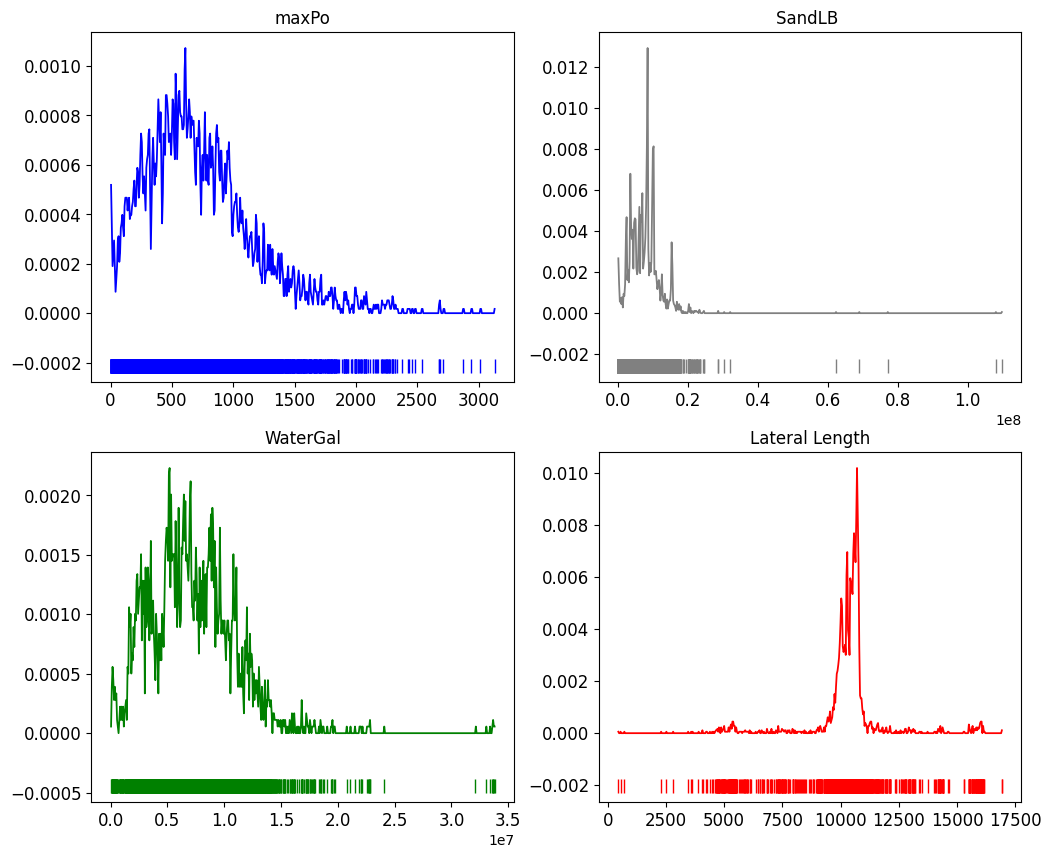

In [86]:
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('maxPo')
az.plot_kde(data['maxPo'],textsize=12, plot_kwargs={'color': 'b'}, rug=True, bw=2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('SandLB ')
az.plot_kde(data['SandLB'],textsize=12, plot_kwargs={'color': 'gray'}, rug=True, bw=2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('WaterGal')
az.plot_kde(data['WaterGal'],textsize=12, plot_kwargs={'color': 'green'}, rug=True, bw=2)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Lateral Length')
az.plot_kde(data['LL'],textsize=12, plot_kwargs={'color': 'red'}, rug=True, bw=2);

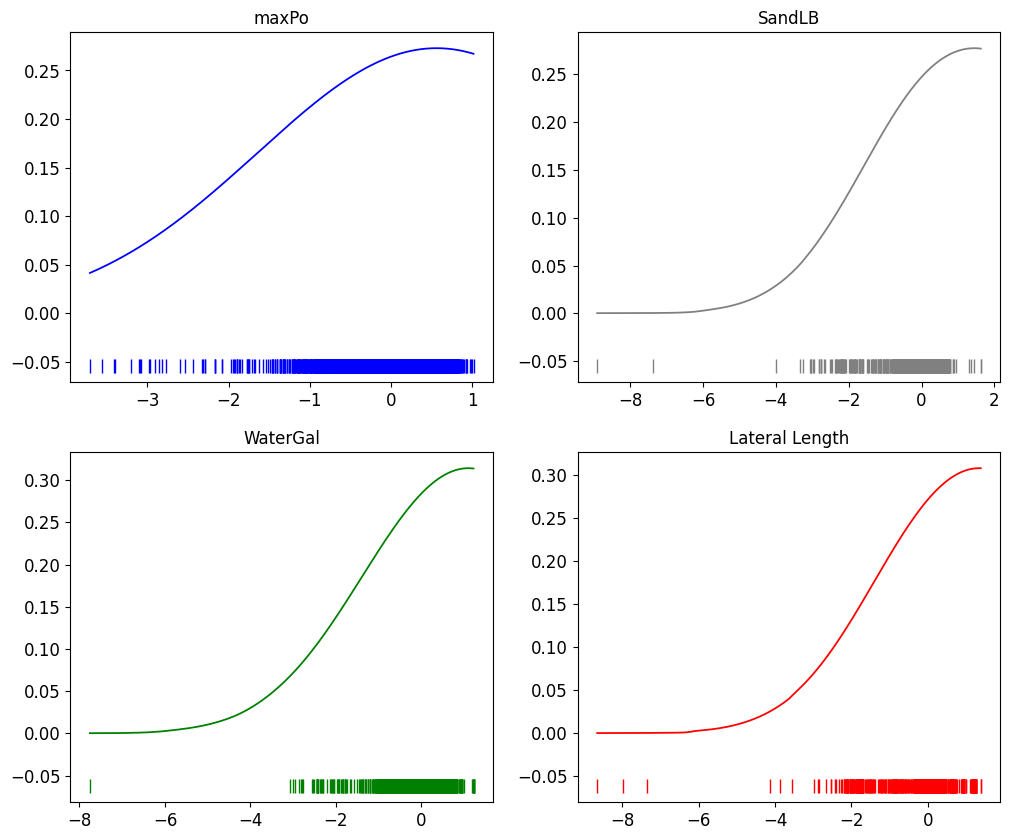

In [87]:
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('maxPo')
az.plot_kde(sData['maxPo'],textsize=12, plot_kwargs={'color': 'b'}, rug=True, bw=2)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('SandLB')
az.plot_kde(sData['SandLB'],textsize=12, plot_kwargs={'color': 'gray'}, rug=True, bw=2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('WaterGal')
az.plot_kde(sData['WaterGal'],textsize=12, plot_kwargs={'color': 'green'}, rug=True, bw=2)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Lateral Length')
az.plot_kde(sData['LL'],textsize=12, plot_kwargs={'color': 'red'}, rug=True, bw=2);

# **5.b Bayesian analysis - PyMC model**

In [88]:
# OLS as a baseline
ls_1 = smf.ols('maxPo ~ WaterGal + SandLB + LL ', data=sData).fit()
ls_1.summary(alpha=0.11)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxPo   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     114.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           8.61e-71
Time:                        22:09:02   Log-Likelihood:                -2432.9
No. Observations:                3579   AIC:                             4874.
Df Residuals:                    3575   BIC:                             4899.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.055      0.945]
------------------------------------------------------------------------------
Intercept   2.673e-16      0.008   3.35e-14      1.000      -0.013       0.013
WaterGal       0.1639      0.021      7.972      0.000       0.131       0.197
SandLB         0.1438      0.020      7.049      0.000       0.111       0.176
LL             0.0575      0.016      3.495      0.000       0.031       0.084
==============================================================================
Omnibus:                     1624.023   Durbin-Watson:                   1.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14075.805
Skew:                          -1.951   Prob(JB):                         0.00
Kurtosis:                      11.897   Cond. No.                         3.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
#PyMC model Hiro3
coords = {
    "time": YEAR_uniques,
    "area": MHB_uniques,
}
with pm.Model(coords=coords) as modelHiro_v3:
# Priors
    α = pm.Normal("α", mu=0, sigma=0.1, dims="area")
    β = pm.Normal("β", mu=0, sigma=0.1, dims="area")
   #sd_α = pm.HalfStudentT("sd_α", nu=3, sigma=2.5) # global
   #α = pm.Normal("α", mu=0, sigma=sd_α, dims="area") # area-specific
   #sd_β = pm.HalfStudentT("sd_β", nu=3, sigma=2.5) # global
   #β = pm.Normal("β", mu=0, sigma=sd_β, dims="area") # area-specific

    γ = pm.GaussianRandomWalk("γ", sigma=0.1, init_dist=pm.Normal.dist(0, 0.1), dims="time")
    τ = pm.GaussianRandomWalk("τ", sigma=0.1, init_dist=pm.Normal.dist(0, 0.1), dims="time")

# Data scale
    σ = pm.HalfNormal("σ", sigma=0.1)
   #σ = pm.HalfStudentT("σ", nu=3, sigma=2.5)

# Data expectation
   #μ = α[wd.MHBn] + τ[wd.YEARn] + (γ[wd.YEARn] + β[wd.MHBn] * wd.WSLm) * wd.LL
   #Use Deterministic to memorize the expression and to track its value in the sampling trace.
    μ = pm.Deterministic("μ", α[wd.MHBn]  + τ[wd.YEARn] + (γ[wd.YEARn] + β[wd.MHBn] * wd.WSLm) * wd.LL)

# Likelihood of observed data
    likelihood = pm.Normal("maxPo", mu=μ, sigma=σ, observed=wd["maxPo"])

    traceHiro_v3 = pm.sample(draws=1000, tune=300, discard_tuned_samples=True, init='auto', chains=3, cores=3, random_seed=2022)

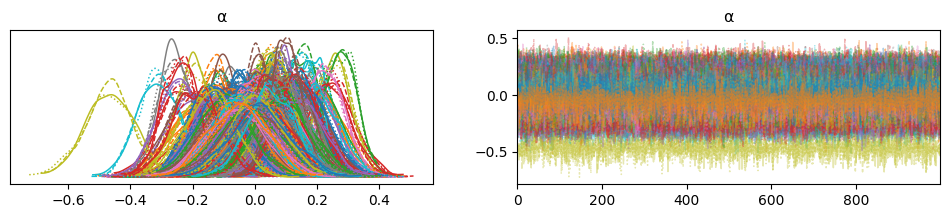

In [90]:
# The function `traceplot` from PyMC was an alias for `plot_trace` from ArviZ. It was removed in PyMC 4.0. Switch to `pymc.plot_trace` or `arviz.plot_trace`.
#pm.plot_trace(traceHiro_v3)
az.plot_trace(traceHiro_v3, var_names=["α"], compact=True);
#az.plot_trace(traceHiro_v3, var_names=["β"], compact=False);
#az.plot_trace(traceHiro_v3, var_names=["γ"], compact=False);
#az.plot_trace(traceHiro_v3, var_names=["τ"], compact=False);

In [91]:
az.summary(traceHiro_v3, var_names=["α"])

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
α[DN78xa]  0.035  0.091  -0.142    0.192      0.001    0.002    7034.0   
α[DN86iw] -0.010  0.100  -0.189    0.185      0.001    0.002    7685.0   
α[DN86ju] -0.016  0.099  -0.198    0.160      0.001    0.002    7654.0   
α[DN86jw]  0.058  0.097  -0.108    0.247      0.001    0.002    8144.0   
α[DN86kw]  0.007  0.100  -0.197    0.186      0.001    0.002    7284.0   
...          ...    ...     ...      ...        ...      ...       ...   
α[DN88vb]  0.011  0.093  -0.155    0.203      0.001    0.002    7665.0   
α[DN88vc]  0.007  0.085  -0.154    0.171      0.001    0.002    6788.0   
α[DN88vd]  0.054  0.077  -0.087    0.201      0.001    0.001    5405.0   
α[DN88ve]  0.016  0.095  -0.152    0.200      0.001    0.002    7281.0   
α[DN88wa] -0.053  0.089  -0.213    0.118      0.001    0.002    7800.0   

           ess_tail  r_hat  
α[DN78xa]    2194.0    1.0  
α[DN86iw]    2007.0    1.0  
α[DN86ju]    1886.0    1.0  
α[DN86jw]    2138.0    1.0  
α[DN86kw]    2114.0    1.0  
...             ...    ...  
α[DN88vb]    2098.0    1.0  
α[DN88vc]    1580.0    1.0  
α[DN88vd]    2128.0    1.0  
α[DN88ve]    1918.0    1.0  
α[DN88wa]    2053.0    1.0  

[402 rows x 9 columns]

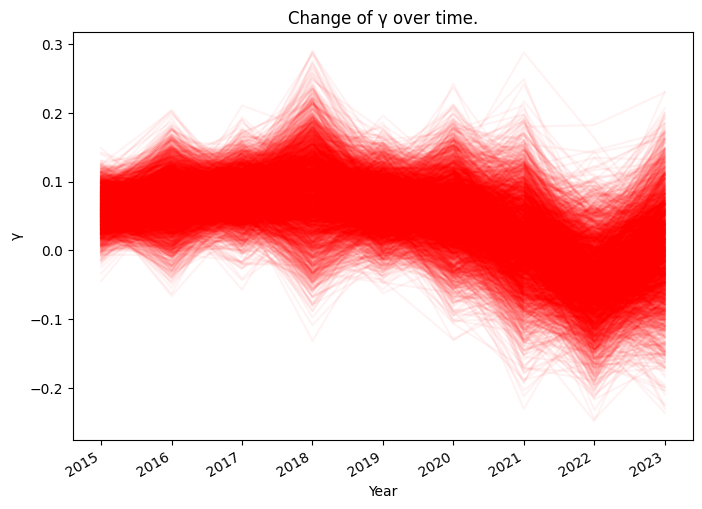

In [92]:
import matplotlib.ticker as mticker

fig = plt.figure(figsize=(8, 6), constrained_layout=False)
ax = plt.subplot(111, xlabel="Year", ylabel="γ", title="Change of γ over time.")
ax.plot(traceHiro_v3.posterior.stack(pooled_chain=("chain", "draw"))["γ"], "r", alpha=0.05)

plt.xticks(range(len(YEAR_uniques)), YEAR_uniques)

fig.autofmt_xdate()

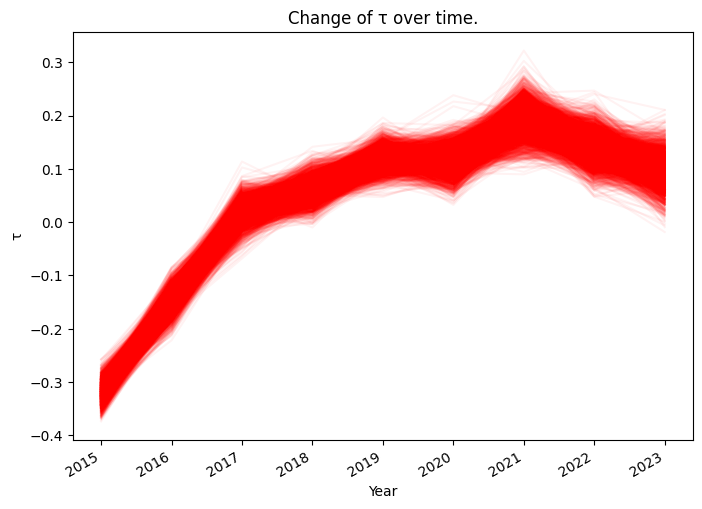

In [93]:
fig = plt.figure(figsize=(8, 6), constrained_layout=False)
ax = plt.subplot(111, xlabel="Year", ylabel="τ", title="Change of τ over time.")
ax.plot(traceHiro_v3.posterior.stack(pooled_chain=("chain", "draw"))["τ"], "r", alpha=0.05)

plt.xticks(range(len(YEAR_uniques)), YEAR_uniques)

fig.autofmt_xdate()

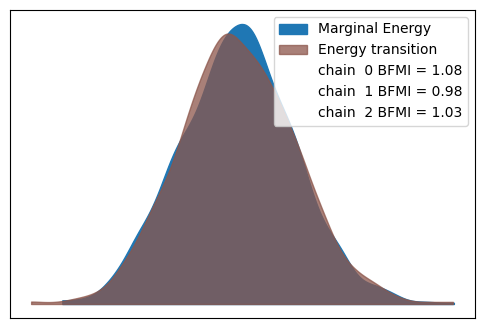

In [94]:
az.plot_energy(traceHiro_v3, figsize=(6, 4));

In [95]:
az.summary(traceHiro_v3, kind="diagnostics")

mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
α[DN78xa]      0.001    0.002    7034.0    2194.0    1.0
α[DN86iw]      0.001    0.002    7685.0    2007.0    1.0
α[DN86ju]      0.001    0.002    7654.0    1886.0    1.0
α[DN86jw]      0.001    0.002    8144.0    2138.0    1.0
α[DN86kw]      0.001    0.002    7284.0    2114.0    1.0
...              ...      ...       ...       ...    ...
μ[3574]        0.001    0.001    6424.0    2201.0    1.0
μ[3575]        0.001    0.001    6431.0    2201.0    1.0
μ[3576]        0.001    0.001    6424.0    2178.0    1.0
μ[3577]        0.001    0.001    6424.0    2178.0    1.0
μ[3578]        0.001    0.001    6424.0    2178.0    1.0

[4402 rows x 5 columns]

In [96]:
trace_hdi = az.hdi(traceHiro_v3)
trace_hdi["α"]

<xarray.DataArray 'α' (area: 402, hdi: 2)>
array([[-0.14197124,  0.19224929],
       [-0.1886581 ,  0.18523359],
       [-0.19822234,  0.16037511],
       [-0.1082334 ,  0.24688676],
       [-0.19667214,  0.18596155],
       [-0.20718984,  0.18316123],
       [-0.20884261,  0.11474251],
       [-0.16666515,  0.17125236],
       [-0.16470194,  0.17866989],
       [-0.18669543,  0.14149129],
       [-0.20219957,  0.17076705],
       [-0.21880936,  0.14015473],
       [-0.20199847,  0.15761685],
       [-0.20069622,  0.1503665 ],
       [-0.35987382, -0.05139855],
       [-0.23914186,  0.11551786],
       [-0.20426206,  0.16020332],
       [-0.17018665,  0.16378848],
       [-0.18255758,  0.15282655],
       [-0.22120238,  0.09911112],
...
       [-0.07898176,  0.23632575],
       [-0.33252681, -0.03993193],
       [-0.19076747,  0.18271148],
       [-0.2049581 ,  0.14491749],
       [-0.20622328,  0.16178393],
       [-0.14437769,  0.21617581],
       [-0.29268678, -0.00361013],
       [-0.21573217,  0.1194708 ],
       [-0.19935829,  0.16441852],
       [-0.22357829,  0.14675396],
       [-0.19979597,  0.15595893],
       [-0.14588548,  0.17708787],
       [-0.18645621,  0.14605842],
       [-0.18774511,  0.2019658 ],
       [-0.23741237,  0.1283118 ],
       [-0.15515828,  0.20309926],
       [-0.15356784,  0.17075511],
       [-0.08704079,  0.20060409],
       [-0.15220464,  0.20045893],
       [-0.21265911,  0.11770463]])
Coordinates:
  * area     (area) <U6 'DN78xa' 'DN86iw' 'DN86ju' ... 'DN88ve' 'DN88wa'
  * hdi      (hdi) <U6 'lower' 'higher'

In [97]:
traceHiro_v3.posterior["α"].median(("chain", "draw"))

<xarray.DataArray 'α' (area: 402)>
array([ 3.35049983e-02, -9.90108051e-03, -1.62127541e-02,  5.77086687e-02,
        6.39574587e-03, -9.41232430e-03, -5.13660844e-02,  2.79561127e-03,
        4.35988824e-03, -3.02364462e-02, -1.45899619e-02, -3.94141878e-02,
       -2.83032512e-02, -2.53371320e-02, -1.99110135e-01, -5.81306496e-02,
       -1.80552397e-02, -1.37457631e-02, -1.38901099e-02, -5.89557293e-02,
        3.35873114e-02, -1.79572260e-01, -1.14868151e-01, -7.74153235e-02,
       -2.45270695e-02, -4.34948786e-02,  6.11730993e-02, -6.10177006e-02,
        1.49767023e-02, -1.42830692e-02, -1.95836554e-03, -1.05178044e-02,
        1.35394424e-02,  4.79843904e-02, -2.74527104e-02,  5.77608806e-02,
        6.67720567e-03,  1.88572904e-01, -5.12222540e-02,  1.08424939e-02,
       -7.33731743e-02,  2.13034607e-02,  1.52335257e-01, -9.98668028e-02,
        1.39190504e-01,  5.06646944e-02,  5.93177329e-02,  7.99392077e-02,
        4.26647936e-02,  4.05647080e-02,  6.76081625e-02, -1.68789598e-01,
       -4.52173883e-02, -1.09386322e-01,  2.18840921e-02,  3.34713637e-02,
       -2.96195748e-03, -7.53070198e-03,  5.38365582e-03,  7.62316337e-02,
        4.00294757e-02,  4.34688622e-02,  4.89138987e-02,  1.11776238e-01,
       -1.59881769e-04,  7.10661053e-02, -2.28288731e-02,  3.25819840e-02,
        5.85519427e-02, -2.31024291e-02, -1.38410875e-01,  2.04533951e-01,
        3.22162045e-02,  6.28547059e-02, -8.93430757e-02,  1.55719321e-01,
       -3.82173837e-02, -7.16406447e-03, -6.18591526e-02,  5.43103926e-02,
...
       -1.18587267e-01, -9.54349386e-03, -3.44637692e-02, -8.52996487e-02,
        6.80355599e-02,  5.23957518e-02, -1.53239804e-02,  6.18636649e-03,
       -6.13317420e-02, -2.40562935e-01, -1.18807726e-01,  1.80568042e-03,
        8.99811588e-03,  1.15352911e-01,  3.49796791e-02,  2.17052109e-02,
       -1.17012819e-01, -7.33914875e-02, -3.47620329e-02,  1.38449423e-01,
        1.84243900e-04,  1.18481278e-01, -4.35623152e-02, -8.64253243e-04,
       -8.42138801e-03, -5.61810444e-02, -4.75122457e-02, -1.26011128e-02,
        9.59755607e-02,  5.37527782e-02,  1.36592714e-01,  1.00870141e-01,
       -7.11367476e-03, -1.74478339e-02,  1.27556592e-03,  1.32824081e-03,
       -1.43815535e-01, -1.68183761e-02, -2.18070204e-02, -2.80610252e-02,
        2.66322028e-02,  4.23729473e-02, -1.02102265e-02,  9.29318607e-02,
        1.29188137e-02, -5.49998302e-02, -2.75683209e-02,  2.52685295e-03,
       -9.56190951e-02, -2.07161638e-02, -4.31927517e-03, -7.27151568e-02,
       -6.55527085e-02, -5.91766145e-02, -3.20326124e-02, -4.31181632e-02,
        4.24996711e-02,  2.49628097e-02,  8.12055065e-02, -1.88813446e-01,
       -1.40019728e-04, -3.58962350e-02, -1.77457379e-02,  4.51092136e-02,
       -1.42688893e-01, -5.01593547e-02, -1.43316699e-02, -3.20201146e-02,
       -2.16650301e-02,  2.15521075e-02, -2.32784494e-02, -4.97016650e-03,
       -5.03175089e-02,  1.04740861e-02,  5.39751646e-03,  5.25067410e-02,
        1.45529197e-02, -5.06372132e-02])
Coordinates:
  * area     (area) <U6 'DN78xa' 'DN86iw' 'DN86ju' ... 'DN88ve' 'DN88wa'

/usr/local/lib/python3.10/dist-packages/arviz/plots/plot_utils.py:271: UserWarning:

rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (402) in plot_posterior, generating only 40 plots



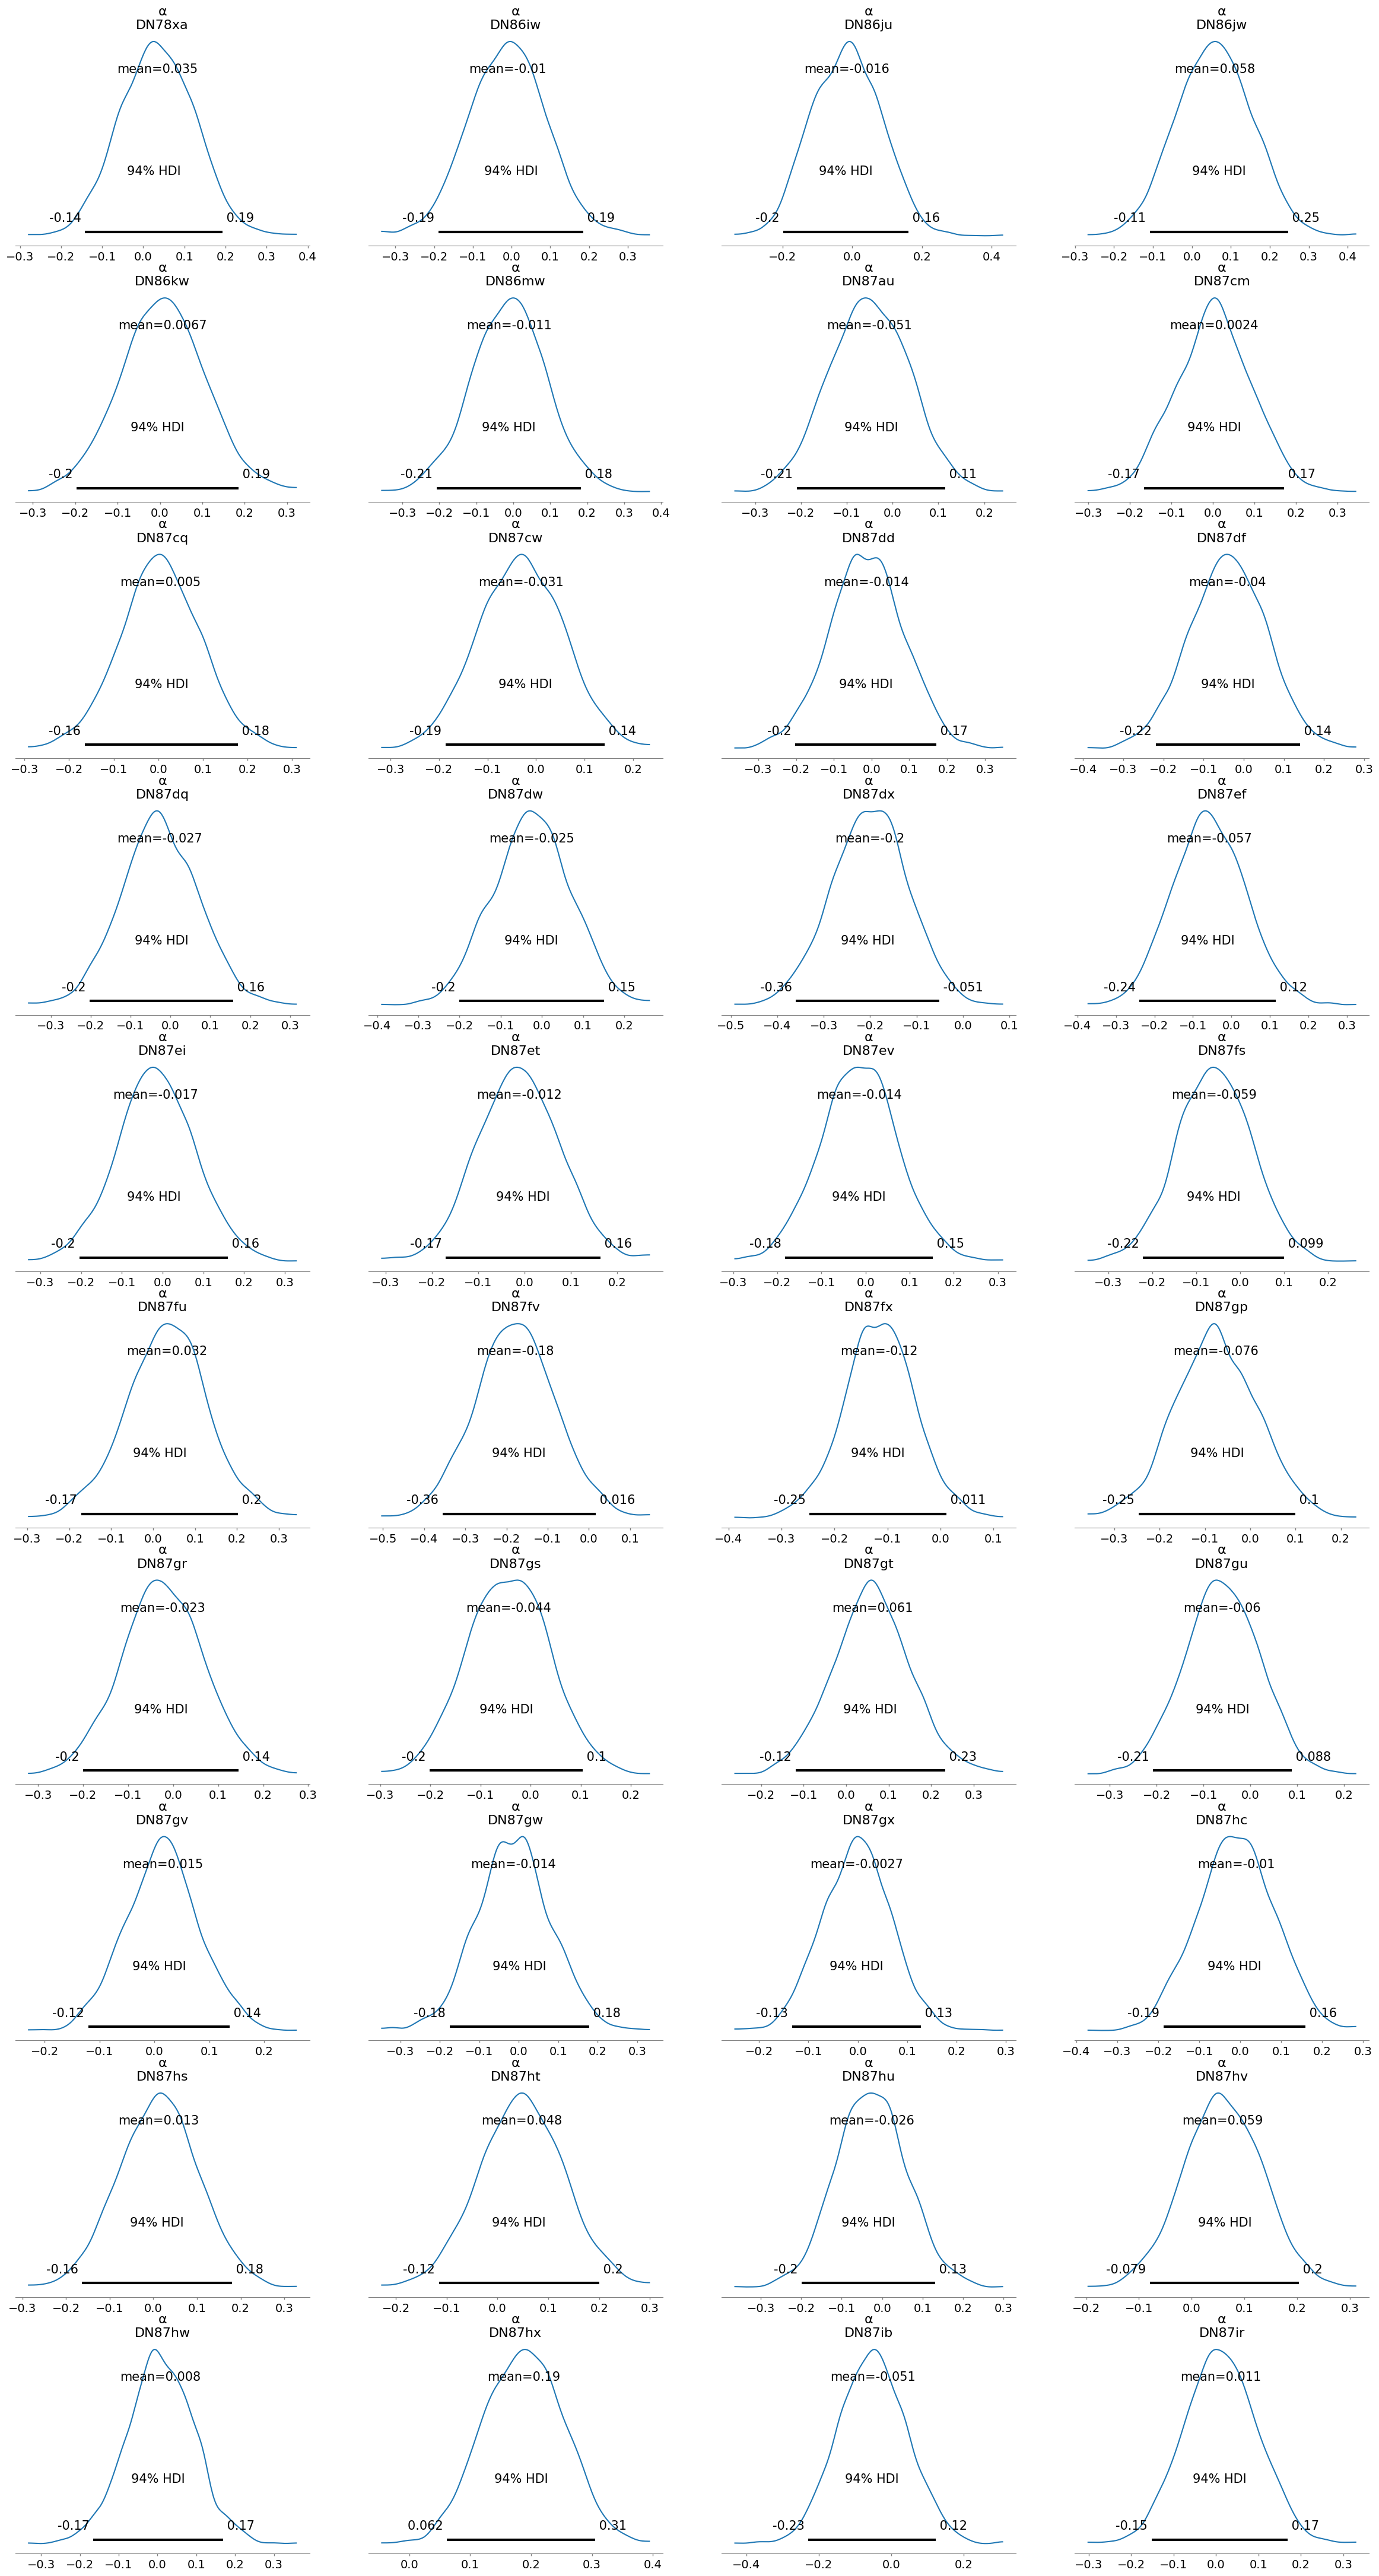

In [98]:
az.plot_posterior(traceHiro_v3, var_names=["α"]);

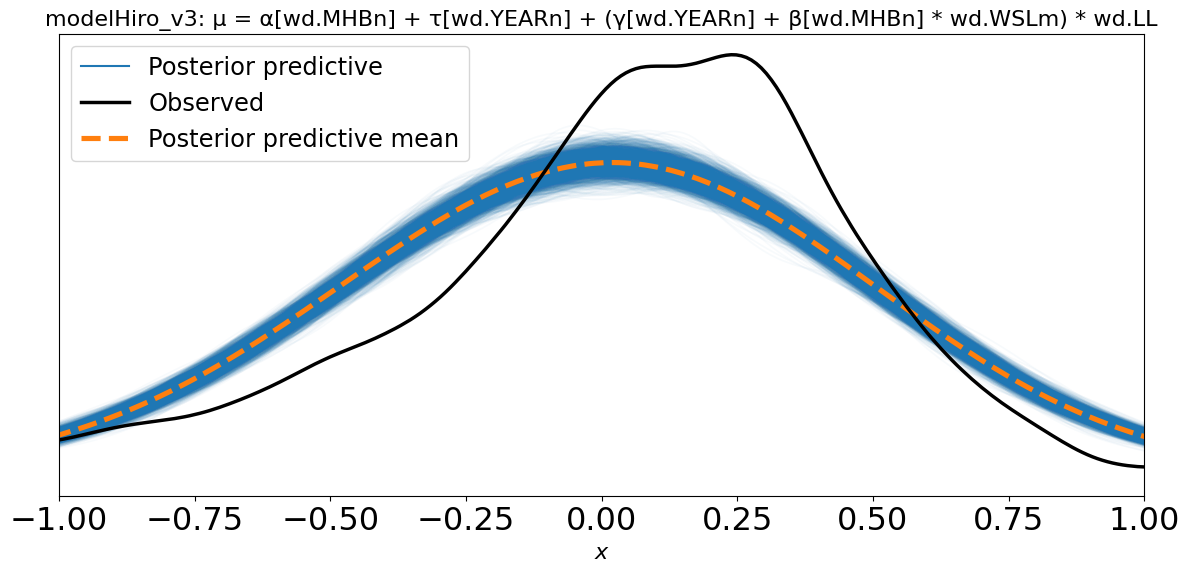

In [99]:
ppc_avg = pm.sample_posterior_predictive(trace=traceHiro_v3, model=modelHiro_v3)
az.plot_ppc(ppc_avg, alpha=0.03, figsize=(14, 6)) #, backend="bokeh")
plt.xlim(-1, 1)
plt.title("modelHiro_v3: μ = α[wd.MHBn] + τ[wd.YEARn] + (γ[wd.YEARn] + β[wd.MHBn] * wd.WSLm) * wd.LL", fontsize=16)
plt.xlabel('$x$', fontsize=16);

In [100]:
az.r2_score(np.array(wd.maxPo), ppc_avg.posterior_predictive.maxPo[0,:,:].values)

r2        0.393350
r2_std    0.006463
dtype: float64

In [101]:
with modelHiro_v3:
    modelHiro_v3_idata = pm.sample_prior_predictive(1000)

modelHiro_v3_idata

Inference data with groups:
	> prior
	> prior_predictive
	> observed_data

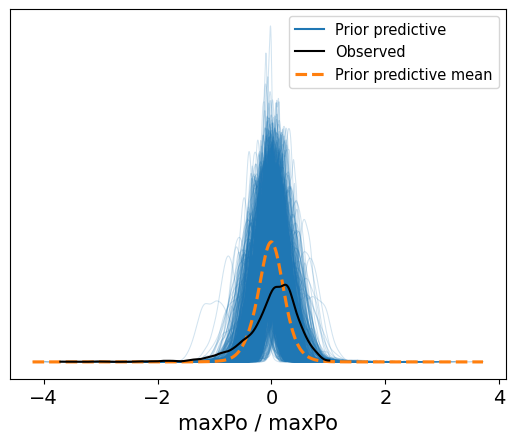

In [102]:
az.plot_ppc(modelHiro_v3_idata, group="prior");

In [103]:
with modelHiro_v3:
    idata_aux = pm.sample()

modelHiro_v3_idata.extend(idata_aux)

/usr/local/lib/python3.10/dist-packages/arviz/plots/backends/matplotlib/pairplot.py:232: UserWarning:

rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid



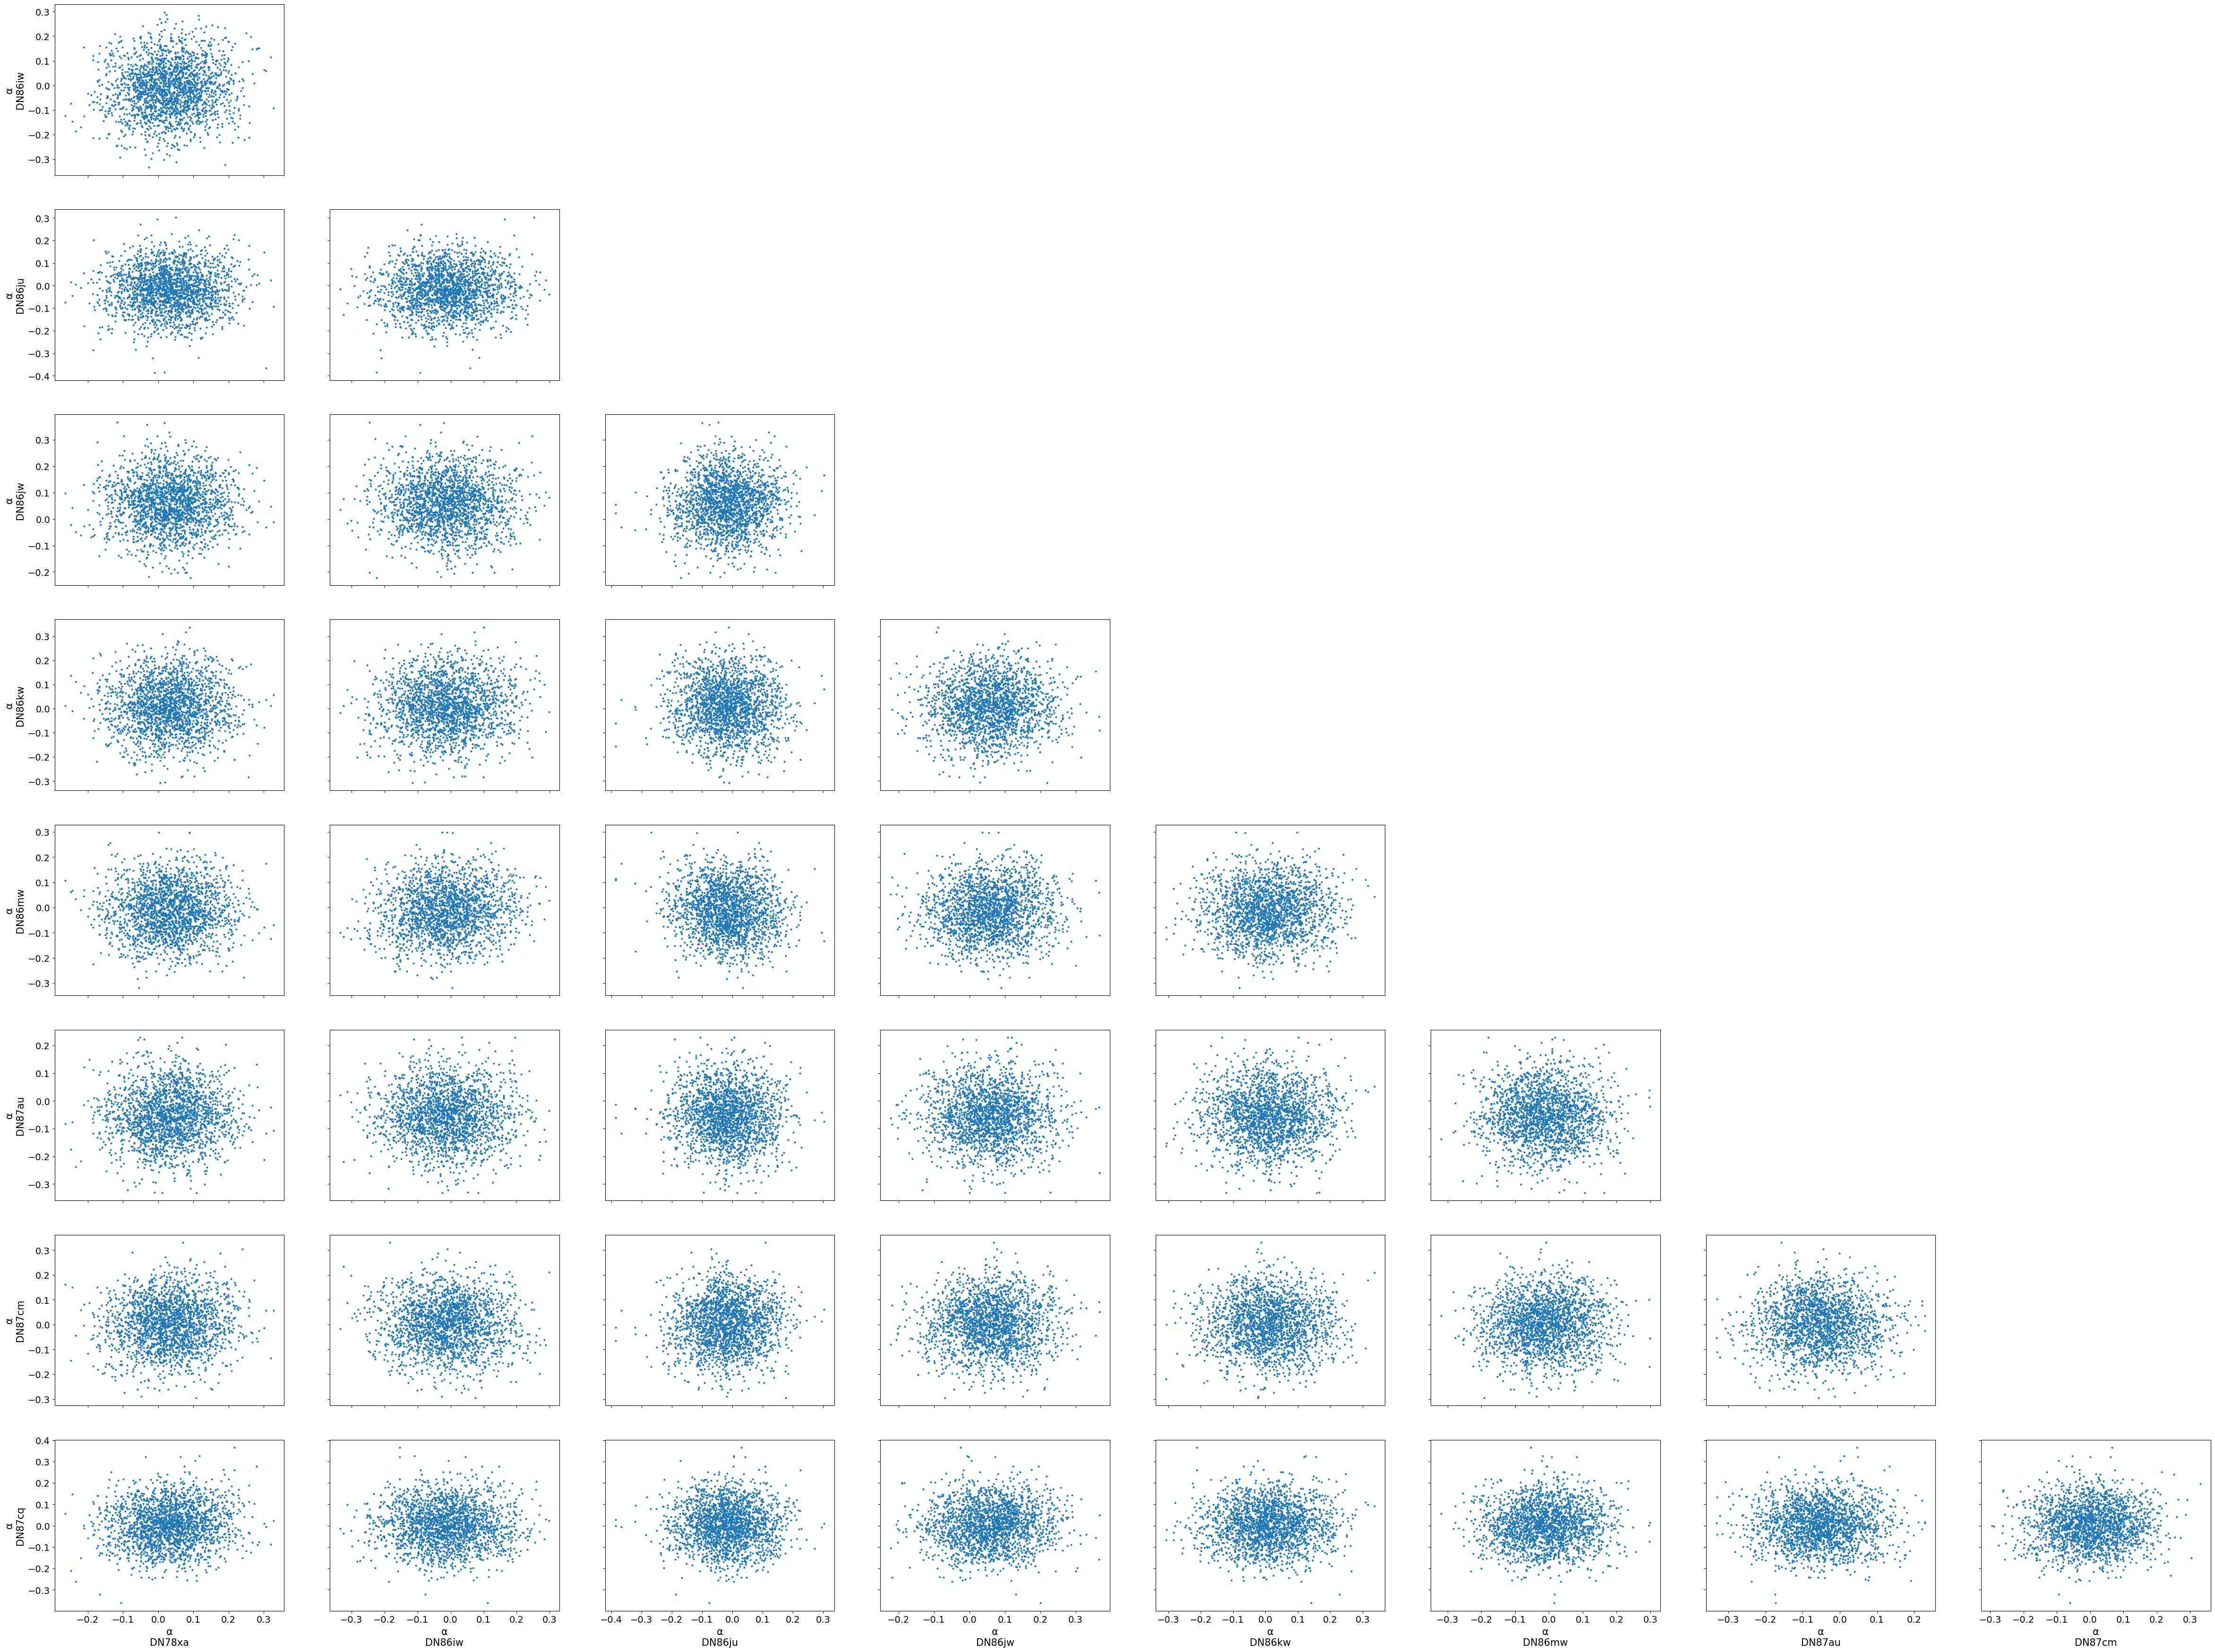

In [104]:
az.plot_pair(modelHiro_v3_idata);

In [105]:
#Posterior predictive
with modelHiro_v3:
    pm.sample_posterior_predictive(modelHiro_v3_idata, extend_inferencedata=True)

In [106]:
estData=az.summary(traceHiro_v3, var_names=["α"], fmt='wide' )

In [107]:
estData.head()

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
α[DN78xa]  0.035  0.091  -0.142    0.192      0.001    0.002    7034.0   
α[DN86iw] -0.010  0.100  -0.189    0.185      0.001    0.002    7685.0   
α[DN86ju] -0.016  0.099  -0.198    0.160      0.001    0.002    7654.0   
α[DN86jw]  0.058  0.097  -0.108    0.247      0.001    0.002    8144.0   
α[DN86kw]  0.007  0.100  -0.197    0.186      0.001    0.002    7284.0   

           ess_tail  r_hat  
α[DN78xa]    2194.0    1.0  
α[DN86iw]    2007.0    1.0  
α[DN86ju]    1886.0    1.0  
α[DN86jw]    2138.0    1.0  
α[DN86kw]    2114.0    1.0

In [108]:
estAlfa = estData[['mean']].reset_index()
estAlfa.head()

index   mean
0  α[DN78xa]  0.035
1  α[DN86iw] -0.010
2  α[DN86ju] -0.016
3  α[DN86jw]  0.058
4  α[DN86kw]  0.007

In [109]:
data2.maxPo.std()

0.8396055306730047

In [110]:
data2.maxPo.mean()

6.336931527183614

In [111]:
estAlfa['expPo'] = estAlfa['mean'] * data2.maxPo.std() * 2 + data2.maxPo.mean()
estAlfa.head(2)

index   mean     expPo
0  α[DN78xa]  0.035  6.395704
1  α[DN86iw] -0.010  6.320139

In [112]:
estAlfa['expPo'] = np.exp(estAlfa['expPo'])
estAlfa.head(2)

index   mean       expPo
0  α[DN78xa]  0.035  599.265006
1  α[DN86iw] -0.010  555.650454

In [113]:
estDataT=az.summary(traceHiro_v3, var_names=["τ"], fmt='wide' )
estDataT

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
τ[2015] -0.319  0.018  -0.350   -0.282        0.0      0.0    4161.0   
τ[2016] -0.148  0.020  -0.186   -0.110        0.0      0.0    4458.0   
τ[2017]  0.019  0.022  -0.025    0.059        0.0      0.0    4564.0   
τ[2018]  0.061  0.022   0.018    0.099        0.0      0.0    4479.0   
τ[2019]  0.119  0.021   0.081    0.157        0.0      0.0    4424.0   
τ[2020]  0.115  0.026   0.069    0.165        0.0      0.0    3952.0   
τ[2021]  0.193  0.031   0.135    0.251        0.0      0.0    4280.0   
τ[2022]  0.139  0.029   0.085    0.193        0.0      0.0    5232.0   
τ[2023]  0.096  0.032   0.036    0.156        0.0      0.0    4084.0   

         ess_tail  r_hat  
τ[2015]    2256.0    1.0  
τ[2016]    2229.0    1.0  
τ[2017]    2704.0    1.0  
τ[2018]    2804.0    1.0  
τ[2019]    2611.0    1.0  
τ[2020]    2067.0    1.0  
τ[2021]    2312.0    1.0  
τ[2022]    2761.0    1.0  
τ[2023]    2624.0    1.0

In [114]:
estTau = estDataT[['mean']].reset_index()
estTau['cyPo'] = estTau['mean'] * data2.maxPo.std() * 2 + data2.maxPo.mean()
estTau

index   mean      cyPo
0  τ[2015] -0.319  5.801263
1  τ[2016] -0.148  6.088408
2  τ[2017]  0.019  6.368837
3  τ[2018]  0.061  6.439363
4  τ[2019]  0.119  6.536758
5  τ[2020]  0.115  6.530041
6  τ[2021]  0.193  6.661019
7  τ[2022]  0.139  6.570342
8  τ[2023]  0.096  6.498136

In [115]:
estTau['cyPo'] = np.exp(estTau['cyPo'])
estTau

index   mean        cyPo
0  τ[2015] -0.319  330.717057
1  τ[2016] -0.148  440.719355
2  τ[2017]  0.019  583.378695
3  τ[2018]  0.061  626.008157
4  τ[2019]  0.119  690.045573
5  τ[2020]  0.115  685.426176
6  τ[2021]  0.193  781.346929
7  τ[2022]  0.139  713.613761
8  τ[2023]  0.096  663.902824

In [116]:
t2a = estTau['cyPo'][0]
t2a

330.71705749167734

In [117]:
estTau['acyPo'] = estTau['cyPo']-t2a
estTau

index   mean        cyPo       acyPo
0  τ[2015] -0.319  330.717057    0.000000
1  τ[2016] -0.148  440.719355  110.002298
2  τ[2017]  0.019  583.378695  252.661637
3  τ[2018]  0.061  626.008157  295.291100
4  τ[2019]  0.119  690.045573  359.328516
5  τ[2020]  0.115  685.426176  354.709118
6  τ[2021]  0.193  781.346929  450.629871
7  τ[2022]  0.139  713.613761  382.896703
8  τ[2023]  0.096  663.902824  333.185766

In [118]:
estAlfa['estPo'] = estAlfa['expPo'] + t2a
estAlfa.head(2)

index   mean       expPo       estPo
0  α[DN78xa]  0.035  599.265006  929.982064
1  α[DN86iw] -0.010  555.650454  886.367511

In [119]:
estAlfa['MHB'] = estAlfa['index'].str.extract(r"\[(.*?)\]", expand=False)
estAlfa.head()

index   mean       expPo       estPo     MHB
0  α[DN78xa]  0.035  599.265006  929.982064  DN78xa
1  α[DN86iw] -0.010  555.650454  886.367511  DN86iw
2  α[DN86ju] -0.016  550.080235  880.797293  DN86ju
3  α[DN86jw]  0.058  622.862488  953.579545  DN86jw
4  α[DN86kw]  0.007  571.740950  902.458008  DN86kw

In [120]:
maxPoe = estAlfa['estPo'].max()
maxPoe

1228.917973172441

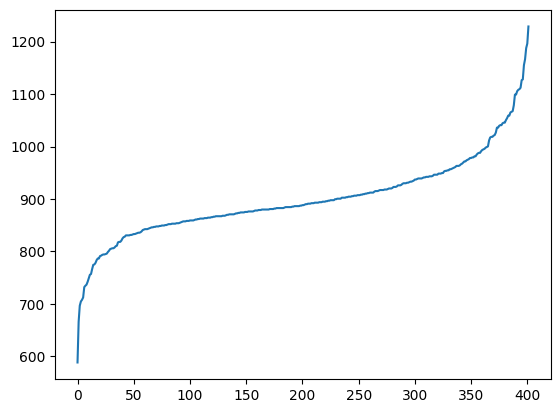

In [121]:
estAlfa['estPo'].sort_values().reset_index(drop=True).plot();

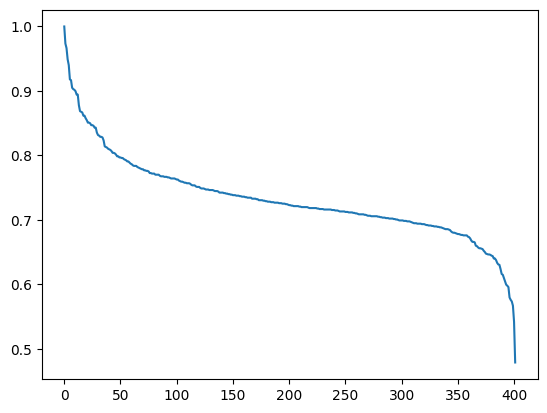

In [122]:
estAlfa['coreIdx'] = estAlfa['estPo']/maxPoe
#estAlfa['coreIdx'].sort_values().reset_index(drop=True).plot();  #(ascending=True)
estAlfa['coreIdx'].sort_values(ascending=False).reset_index()['coreIdx'].plot();

In [123]:
estAlfa.to_csv('BakkenEstCoAlfaLog.csv')
files.download('BakkenEstCoAlfaLog.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>